In [1]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
import plot_likert


In [ ]:
Qs_likert7 = {'V1': range(1, 6), 'V2': range(1, 4), 'V7': range(1, 6)}
csv_dtypes = {}
for v in Qs_likert7:
    for v2 in Qs_likert7[v]:
        csv_dtypes[f"{v}_{v2}"] = 'category'

csv_dtypes['V6a'] = 'category'
csv_dtypes['V6b'] = 'category'
csv_dtypes['V1_1'] = 'category'

df = pd.read_csv("BACTIWET_eindbestand.csv", dtype=csv_dtypes)
df

Unnamed: 0 V00                   V1_1                 V1_2  \
0              0  Ja               Mee eens    Helemaal mee eens   
1              1  Ja  Een beetje mee oneens             Neutraal   
2              2  Ja    Een beetje mee eens             Mee eens   
3              3  Ja    Een beetje mee eens             Mee eens   
4              4  Ja    Een beetje mee eens    Helemaal mee eens   
...          ...  ..                    ...                  ...   
997          997  Ja    Een beetje mee eens             Mee eens   
998          998  Ja  Een beetje mee oneens             Neutraal   
999          999  Ja    Helemaal mee oneens             Mee eens   
1000        1000  Ja    Een beetje mee eens  Een beetje mee eens   
1001        1001  Ja             Mee oneens             Neutraal   

                       V1_3                   V1_4                   V1_5  \
0         Helemaal mee eens      Helemaal mee eens      Helemaal mee eens   
1                  Neutraal  Een beetje mee oneens  Een beetje mee oneens   
2                  Mee eens    Een beetje mee eens    Een beetje mee eens   
3       Een beetje mee eens    Helemaal mee oneens               Mee eens   
4       Een beetje mee eens    Een beetje mee eens      Helemaal mee eens   
...                     ...                    ...                    ...   
997                Mee eens               Mee eens      Helemaal mee eens   
998              Mee oneens             Mee oneens             Mee oneens   
999              Mee oneens    Helemaal mee oneens               Neutraal   
1000    Een beetje mee eens    Een beetje mee eens               Mee eens   
1001  Een beetje mee oneens             Mee oneens               Neutraal   

                     V2_1                   V2_2                   V2_3  ...  \
0       Helemaal mee eens  Een beetje mee oneens    Helemaal mee oneens  ...   
1                Neutraal    Een beetje mee eens  Een beetje mee oneens  ...   
2       Helemaal mee eens    Een beetje mee eens    Helemaal mee oneens  ...   
3     Een beetje mee eens    Een beetje mee eens    Een beetje mee eens  ...   
4       Helemaal mee eens    Een beetje mee eens             Mee oneens  ...   
...                   ...                    ...                    ...  ...   
997              Mee eens    Een beetje mee eens             Mee oneens  ...   
998   Een beetje mee eens    Een beetje mee eens    Een beetje mee eens  ...   
999            Mee oneens    Een beetje mee eens               Mee eens  ...   
1000             Mee eens               Neutraal             Mee oneens  ...   
1001  Helemaal mee oneens               Neutraal      Helemaal mee eens  ...   

     Opmerkingen_Codes  Cijfer GESLACHT2 OPLEID_HER                 IOPOL2023  \
0                  NaN      10       Man       hoog           GroenLinks-PvdA   
1                  NaN       6     Vrouw     midden  Nee, ik heb niet gestemd   
2                  NaN       8     Vrouw       hoog           GroenLinks-PvdA   
3                  NaN       7       Man     midden                       PVV   
4                  NaN       8       Man       hoog                       D66   
...                ...     ...       ...        ...                       ...   
997                NaN       7       Man       hoog  Nee, ik heb niet gestemd   
998                NaN       4     Vrouw     midden  Nee, ik heb niet gestemd   
999                NaN       7       Man     midden     Forum voor Democratie   
1000               NaN       8     Vrouw     midden              ChristenUnie   
1001               NaN       5       Man       laag     Forum voor Democratie   

                     stedc           nielsen_4   LFT5 lft_weging_Niels  \
0     Zeer sterk stedelijk   West (UT, NH, ZH)  25-39        18 t/m 39   
1     Zeer sterk stedelijk   West (UT, NH, ZH)  18-24        18 t/m 39   
2     Zeer sterk stedelijk   West (UT, NH, ZH)  55-64        40 t/m 64   
3     Zeer sterk stedelijk   West 

In [3]:
df = df.rename(columns={'groep_split': 'Condition'})
# remove non-agreement
df.drop(df[df.V00 != 'Ja'].index, inplace=True)

In [4]:
# Replace Likert scale with numbers

mapping_7 = {'Helemaal mee oneens': 1,
             'Mee oneens': 2,
             'Een beetje mee oneens': 3,
             'Neutraal': 4,
             'Een beetje mee eens': 5,
             'Mee eens': 6,
             'Helemaal mee eens': 7
}

likert_labels = ['Completely disagree\n(Likert scale=1)',
                 'Disagree\n(Likert scale=2)',
                 'Slightly disagree\n(Likert scale=3)',
                 'Neutral\n(Likert scale=4)',
                 'Slightly agree\n(Likert scale=5)',
                 'Agree\n(Likert scale=6)',
                 'Completely Agree\n(Likert scale=7)'
]

for v in Qs_likert7:
    for v2 in Qs_likert7[v]:
        df[f"{v}_{v2}"] = df[f"{v}_{v2}"].cat.rename_categories(mapping_7).astype(float)


In [5]:
# Replace words in other scales with numbers

Qs_words = {'V4': range(1, 3), 'V5': range(1, 10)}

for v in Qs_words:
    for v2 in Qs_words[v]:
        df[f"{v}_{v2}"] = df[f"{v}_{v2}"].str[0].replace("n", np.nan).astype(float)

In [6]:
# Replace garden words

df["V6a"] = df["V6a"].cat.rename_categories({'Ja': 1, 'Nee': 0})
garden_types = {"In mijn tuin is de grond vooral betegeld": 0,
                "In mijn tuin is de grond ongeveer evenveel beplant (groen) als betegeld": 1,
                "In mijn tuin is de grond vooral beplant (groen)": 2}
df["V6b"] = df["V6b"].cat.rename_categories(garden_types)

In [7]:
# Define some translations from Dutch to English and expand labels and questions
cat_translations = {'hoog': 'high', 'midden': 'middle', 'laag': 'low',
                    'Man': 'men', 'Vrouw': 'women',
                    'West (UT, NH, ZH)': "west", 'Oost (OV, GD, FL)': "east", 'Zuid (ZL, NB, LB)': "south", 'Noord (GR, FR, DR)': "north",
                    "18-24": "18-24", "25-39": "25-39", "40-54": "40-54", "55-64": "55-64", "65": "65+",
                    "PVV": "PVV", "GroenLinks-PvdA": "GL-PvdA", "VVD": "VVD", "NSC": "NSC", "D66": "D66", "BBB": "BBB",}

named_labels = {"CCC": "Climate Change Concern",
                "SCT": "Science Capital & Trust",
                "V5_mean": "Perceived Credibility",}

questions = {"V1_1": "I am generally aware of new scientific discoveries and developments",
             "V1_2": "I generally find scientists to be trustworthy",
             "V1_3": "I am interested in the scientific process and the results it yields",
             "V1_4": "I regularly talk about science with other people [...]",
             "V1_5": "I think it's important that scientists communicate about their research",
             "V2_1": "I think human influence on climate change is an important issue",
             "V2_2": "I want to know more about climate change",
             "V2_3": "The influence of humans on climate change is exaggerated",
             "V4_1": ['Professional', 'Personal'],
             "V4_2": ['Formal', 'Informal'],
             "V5_1": ['Not at all sensitive', 'Very sensitive'],
             "V5_2": ['Not at all sincere', 'Very sincere'],
             "V5_3": ['Not at all expert', 'Very expert'],
             "V5_4": ['Not at all trustworthy', 'Very trustworthy'],
             "V5_5": ['Not at all competent', 'Very competent'],
             "V5_6": ['Not at all honest', 'Very honest'],
             "V5_7": ["Isn't concerned about society", 'Is concerned about society'],
             "V5_8": ["Doesn't care about society", 'Cares about society'],
             "V5_9": ['Not at all intelligent', 'Very intelligent'],
             "V7_1": "The article provides neutral information",
             "V7_2": "The article is based on scientific research",
             "V7_3": "The article mostly provides the author's opinion",
             "V7_4": "The graphic in the article helps me better understand the article",}

credibility_dimensions = {'V5_1': "Goodwill",
                          'V5_2': "Integrity",
                          'V5_3': "Competence",
                          'V5_4': "Integrity",
                          'V5_5': "Competence",
                          'V5_6': "Integrity",
                          'V5_7': "Goodwill",
                          'V5_8': "Goodwill",
                          'V5_9': "Competence",
}

credibility_dimension_colors = {'Goodwill': "#E8F6E6",
                                'Competence': "#E1EDF9",
                                'Integrity': "#FAE5D7",
}


In [8]:
# Define which groupings to plot and other plot settings
Conditions = {'A': 'Science Arbiter with Bar chart',
              'C': 'Science Arbiter with Photo',
              'B': 'Issue Advocate with Bar chart',
              'D': 'Issue Advocate with Photo'}

Condition_text = {'IA': 'Issue Advocate', 'SA': 'Science Arbiter'}
Condition_graph = {'bar chart': 'Bar chart', 'photo': 'Photo'}

# Define order of political parties
party_order = ['PVV', 'BBB', 'VVD', 'NSC', 'D66', 'GroenLinks-PvdA']

figwidth = 12  # set the width for all Figures


In [ ]:
# remove rows where V3 is not filled in (from codebook)
non_answers = df[df.V3_Codes.isna() & df.V3.notna()]
print(non_answers["V3"])

df = df.drop(non_answers.index)

328                   Geen idee,teveel tekst om te lzen
402             Nee want ik kan de tekst niet onthouden
435     niet goed genoeg gelezen maar ik kan niet terug
504    Ik drukte te snel door, dus heb het niet gelezen
735                     Te lang, ik kan niet goed lezen
807                             Nee, te veel informatie
Name: V3, dtype: object


In [10]:
print(f"Total amount of valid surveys: {len(df)}")
print(df.groupby("Condition", observed=True).size().to_string())


Total amount of valid surveys: 996
Condition
A    251
B    242
C    254
D    249


In [11]:
# Create a new column for text condition only
df["Condition_text"] = df.Condition.replace({'A': 'SA', 'B': 'IA', 'C': 'SA', 'D': 'IA'})
df["Condition_text"] = df.Condition_text.astype('category')
print(df.groupby("Condition_text", observed=True).size().to_string())

Condition_text
IA    491
SA    505


In [12]:
# Create a new column for graphic condition only
df["Condition_graph"] = df.Condition.replace({'A': 'bar chart', 'B': 'bar chart', 'C': 'photo', 'D': 'photo'})
df["Condition_graph"] = df.Condition_graph.astype('category')
print(df.groupby("Condition_graph", observed=True).size().to_string())

Condition_graph
bar chart    493
photo        503


In [13]:
# calculate mean credibility score
df["V5_mean"] = df[[f"V5_{v}" for v in range(1, 10)]].mean(axis=1)

Mean appreciation grade is 7.6


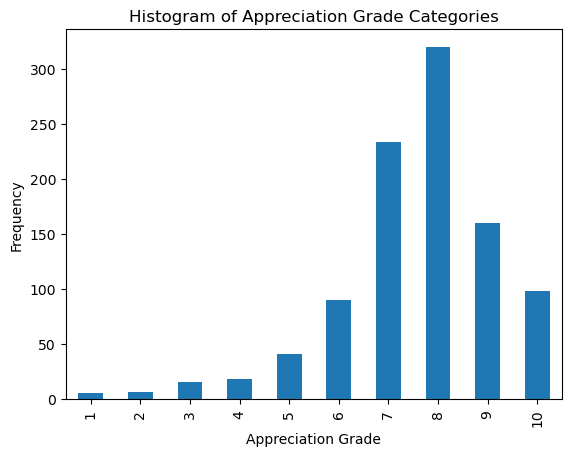

In [14]:
cijfers = df.Cijfer[~df['Cijfer'].isin(["Weet niet"]) & df['Cijfer'].notna()]
# cijfers = cijfers.cat.remove_unused_categories()
cijfers = pd.to_numeric(cijfers)
cijfers.value_counts().sort_index().plot(kind='bar')
print(f"Mean appreciation grade is {cijfers.mean():.1f}")
plt.xlabel('Appreciation Grade')
plt.ylabel('Frequency')
plt.title('Histogram of Appreciation Grade Categories')
plt.show()

In [15]:
df["SCT"] = df[[f"V1_{v}" for v in range(1, 6)]].mean(axis=1)
print(f'{named_labels["SCT"]}: M={df.SCT.mean():.1f}, SD={df.SCT.std():.1f}')

ca = pg.cronbach_alpha(df[[f"V1_{v}" for v in range(1, 6)]])
print(f"{named_labels["SCT"]} Cronbach-Alpha: {ca[0]:.2f}")


Science Capital & Trust: M=4.8, SD=1.1
Science Capital & Trust Cronbach-Alpha: 0.80


In [16]:
# Swap the values of the question "The influence of humans on climate change is exaggerated"
df["V2_3_inv"] = 8-df["V2_3"]

df["CCC"] = (df["V2_1"] + df["V2_2"] + df["V2_3_inv"])/3.
print(f'{named_labels["CCC"]}: M={df.CCC.mean():.1f}, SD={df.CCC.std():.1f}')

ca = pg.cronbach_alpha(df[[f"V2_{v}" for v in ['1', '2', '3_inv']]])
print(f"{named_labels["CCC"]} Cronbach-Alpha: {ca[0]:.2f}")


Climate Change Concern: M=4.9, SD=1.4
Climate Change Concern Cronbach-Alpha: 0.82


In [17]:
def add_hatchting(a):
    # helper function to add hatches to the 'negative' bars
    bars = [thing for thing in a.containers if isinstance(thing, matplotlib.container.BarContainer)]
    for bar in bars[1:4]:
        for patch in bar:
            patch.set_hatch("//")


In [18]:
def plot_scorebars(data, ai, colors, withmeans=True, toplabels=True, bottomlabels=True, withstats=False):
    N = np.zeros((len(data.columns), 7))
    for i, c in enumerate(data.columns): #Conditions.values()):
        N[i, :] = np.histogram(data[c], bins=np.arange(0, 8, 1))[0]
        N[i, :] = N[i, :] / N[i, :].sum() * 100
    Nc = np.cumsum(N, axis=1)

    ai2 = ai.twiny()
    for i in range(N.shape[0]):
        for j in range(N.shape[1]):
            ai.bar(Nc[i][j], 0.75, width=-N[i][j], bottom=i+.125, color=colors[j], align='edge')
            if N[i][j] > 3:
                ai.text(Nc[i][j]-N[i][j]/2, i+.5, f"{N[i][j]:.0f}%", ha='center', va='center', color='black')
        if withmeans:
            mean = data.iloc[:, i].mean()
            std = data.iloc[:, i].std()
            ai2.errorbar(mean, i+0.5, xerr=std, fmt='none', color='grey', capsize=4)
            ai2.plot(mean, i+0.5, marker='s', color='black')

    if withstats:
        ylabels = []
        for k, name in enumerate(data.columns):
            spacechar = '\n' #if len(name) > 20 else ' '
            statsstr = f"(N={data.iloc[:, k].count():2d}, M={data.iloc[:, k].mean():.1f}, SD={data.iloc[:, k].std():.1f})"
            ystr = f"{name}{spacechar}"+r"\footnotesize{"+statsstr+"}"
            ylabels.append(ystr)
    else:
        ylabels = data.columns

    ai.set_yticks(np.arange(0.5, N.shape[0]+.5, 1))
    ai.set_yticklabels(ylabels)
    if bottomlabels:
        ai.set_xticks(np.arange(0, 101, 10))
        ai.set_xticklabels([f"{i}%" for i in range(0, 101, 10)])
        ai.set_xlabel("Percentage of responses")
    else:
        ai.set_xticks([])
    if toplabels:
        ai2.set_xticks(np.arange(0, 8, 1))
        ai2.set_xticklabels([rf"$\mathsf{{{i}}}$" for i in range(0, 8)])
        ai2.set_xlabel("Mean score")
    else:
        ai2.set_xticks([])
    ai.set_xlim([0, 100])
    ai2.set_xlim([0, 7])
    ai.set_ylim([0, N.shape[0]])
    ai.invert_yaxis()


In [19]:
def plot_brackets(ai_bracket, ai, pval, pt, column_mapping):
    # helper function to plot brackets for significant differences on the axis
    pfmt = f"{pval:.3f}" if pval > 0.001 else f"{pval:.0e}"
    ai_bracket.set_xlabel(r"{\it p} $=$ "+pfmt+"(*)")
    bracket_dx = 0.7
    x_bracket = 0

    ylabels = ai.get_yticklabels()
    if len(pt) > 2:
        for _, row in pt.iterrows():
            if row['A'] in column_mapping and row['B'] in column_mapping:
                pval = row['p-corr']
                y_bracket = []
                for c in [column_mapping[row['A']], column_mapping[row['B']]]:
                    for yl in ylabels:
                        if c in yl.get_text():
                            y_bracket.append(yl.get_position()[1])
                pval = row['p-corr']
                if pval < 0.05:
                    ai_bracket.plot([x_bracket, x_bracket], [y_bracket[0], y_bracket[1]], 'k-', lw=1)
                    ai_bracket.plot([x_bracket, x_bracket-bracket_dx], [y_bracket[0], y_bracket[0]], 'k-', lw=1)
                    ai_bracket.plot([x_bracket, x_bracket-bracket_dx], [y_bracket[1], y_bracket[1]], 'k-', lw=1)
                    x_bracket += 2

            # star = ' (*)' if pval < 0.05 else ''
            # print(f"{row['A']} vs {row['B']}: {pval:.3f}{star}")
    else:
        yl = ai.get_ylim()
        ai_bracket.plot([x_bracket, x_bracket], [min(yl)+.5, max(yl)-.5], 'k-', lw=1)
        ai_bracket.plot([x_bracket, x_bracket-bracket_dx], [min(yl)+.5, min(yl)+.5], 'k-', lw=1)
        ai_bracket.plot([x_bracket, x_bracket-bracket_dx], [max(yl)-.5, max(yl)-.5], 'k-', lw=1)

    ai_bracket.set_xticks([])
    ai_bracket.set_yticks([])
    for sp in ai_bracket.spines:
        ai_bracket.spines[sp].set_visible(False)
    ai_bracket.set_xlim([-1, 20])
    ai_bracket.set_ylim(ai.get_ylim())


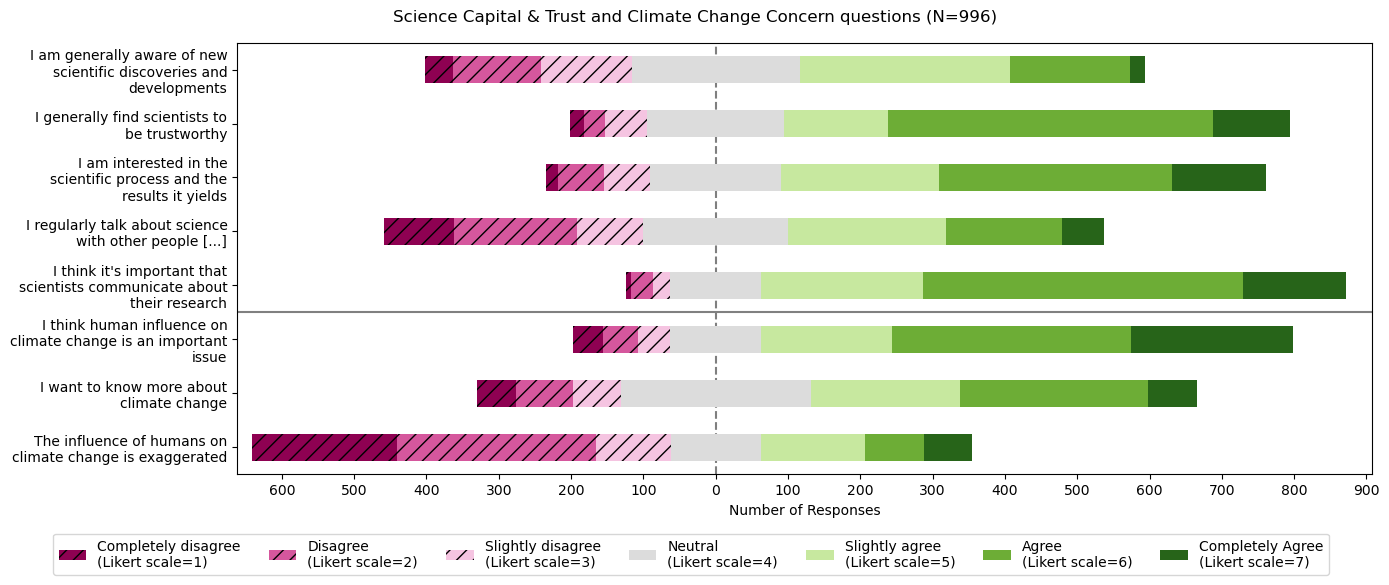

In [20]:
# Figure 1: SCT and CCC questions
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
cmap = matplotlib.colormaps['PiYG']
colors = ["#ffffff00"] + [cmap(i) for i in np.linspace(0, 1, 7)]
colors[4] = "gainsboro"

data = pd.DataFrame([df[f"V1_{v}"] for v in range(1, 6)] + [df[f"V2_{v}"] for v in range(1, 4)]).T
data.columns = [questions[f"V1_{v}"] for v in range(1, 6)] + [questions[f"V2_{v}"] for v in range(1, 4)]

a = plot_likert.plot_likert(data, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ax=ax, colors=colors, xtick_interval=100)
add_hatchting(a)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, likert_labels, loc='lower center', ncol=7, bbox_to_anchor=(0.4, -0.25)) #bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

xl = ax.get_xlim()
ax.hlines(2.5, xl[0], xl[1], color='grey', linestyle='-')

plt.suptitle(f"{named_labels["SCT"]} and {named_labels["CCC"]} questions (N={len(df)})")
plt.tight_layout()
plt.show()


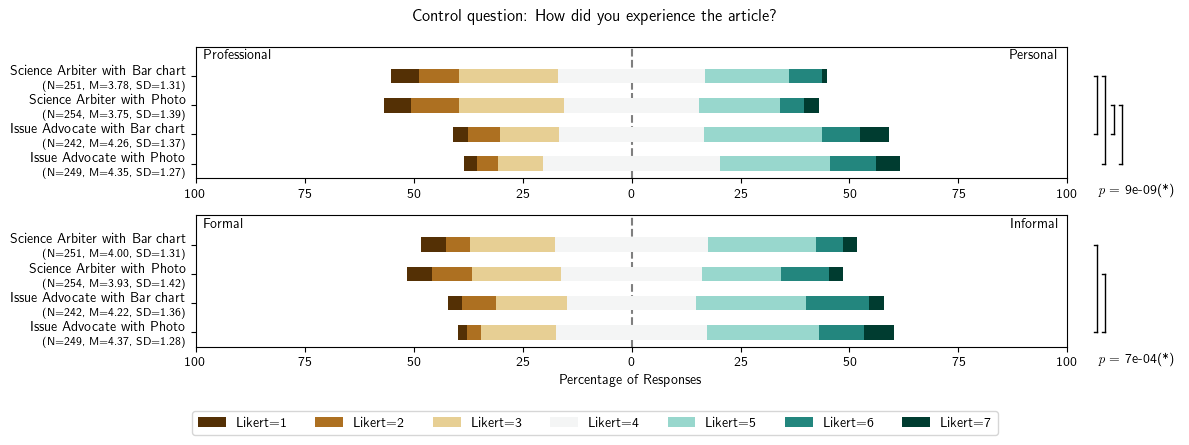

In [21]:
# Figure 2: conctrol questions on experience with the article
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(figwidth, 4))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 1], width_ratios=[1, 0.1])
question = "V4"
subqs = [1, 2]

cmap = matplotlib.colormaps['BrBG']
colors = ["#ffffff00"] + [cmap(i) for i in np.linspace(0, 1, 7)]

for i, v in enumerate(subqs):
    ai = fig.add_subplot(gs[i, 0])

    data = pd.DataFrame([df[f"{question}_{v}"].where(df["Condition"]==c) for c in Conditions.keys()]).T
    data.columns = Conditions.values()

    plot_likert.plot_likert(data, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ax=ai, colors=colors, plot_percentage=True, xtick_interval=25, pad_100=True)

    ai.set_xlim([0, 200])
    ai.set_ylim([-0.5, 4])
    ai.text(0.01, 0.98, questions[f"{question}_{v}"][0], transform=ai.transAxes, ha='left', va='top')
    ai.text(0.99, 0.98, questions[f"{question}_{v}"][1], transform=ai.transAxes, ha='right', va='top')
    ai.get_legend().remove()
    ai.set_xlabel("")

    ylabels = ai.get_yticklabels()
    for k, ylabel in enumerate(ylabels):
        statsstr = f"(N={data[ylabel.get_text()].count():d}, M={data[ylabel.get_text()].mean():.2f}, SD={data[ylabel.get_text()].std():.2f})"
        ylabels[k] = f"{ylabel.get_text()}\n"+r"\footnotesize{"+statsstr+"}"
    ai.set_yticklabels(ylabels)

    pval = pg.anova(dv=f"{question}_{v}", between="Condition", data=df, detailed=False)['p-unc'].mean()
    if pval < 0.05:
        ai_bracket = fig.add_subplot(gs[i,1])
        pt = pg.pairwise_tests(dv=f"{question}_{v}", between="Condition", data=df, padjust='holm', alternative='two-sided')
        plot_brackets(ai_bracket, ai, pval, pt, column_mapping=Conditions)

ai.set_xlabel("Percentage of Responses")

handles, labels = ai.get_legend_handles_labels()
fig.legend(handles, [f"Likert={k}" for k in range(1, 8)], loc='lower center', ncol=7, bbox_to_anchor=(0.5, -0.1))

plt.suptitle(f"Control question: How did you experience the article?")
plt.tight_layout()
plt.show()

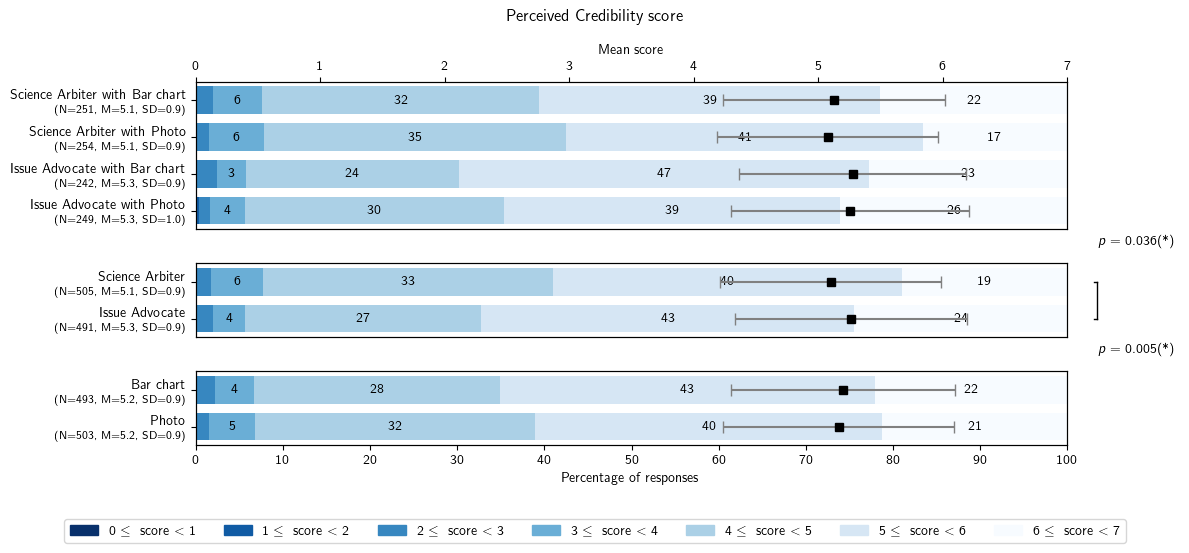

In [22]:
# Figure 3: perceived credibility score figure (also for only text and only graphic condition)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\familydefault}{\sfdefault}'

cred_colors=matplotlib.colormaps['Blues'](np.linspace(1, 0, 7))
fig = plt.figure(figsize=(figwidth, 5))
gs = GridSpec(3, 2, figure=fig, width_ratios=[1, 0.1], height_ratios=[2, 1, 1])

for i, condition in enumerate(['Condition', 'Condition_text', 'Condition_graph']):
    ai = fig.add_subplot(gs[i, 0])

    if condition == 'Condition':
        data = pd.DataFrame([df["V5_mean"].where(df["Condition"]==c) for c in Conditions.keys()]).T
        data.columns = Conditions.values()
    elif condition == 'Condition_text':
        data = pd.DataFrame([df["V5_mean"].where(df[condition]==c) for c in ['SA', 'IA']]).T
        # data.columns = ['Logical scientific', 'Advocacy']
        data.columns = ['Science Arbiter', 'Issue Advocate']
    elif condition == 'Condition_graph':
        data = pd.DataFrame([df["V5_mean"].where(df[condition]==c) for c in ['bar chart', 'photo']]).T
        data.columns = ['Bar chart', 'Photo']
    bottomlabels = True if i ==2 else False
    toplabels = True if i == 0 else False
    plot_scorebars(data, ai, cred_colors, withmeans=True, toplabels=toplabels, bottomlabels=bottomlabels, withstats=True)

    plt.suptitle(f"{named_labels["V5_mean"]} score")

    pval = pg.anova(dv="V5_mean", between=condition, data=df, detailed=False)['p-unc'].mean()
    if pval < 0.05:
        ai_bracket = fig.add_subplot(gs[i,1])
        pt = pg.pairwise_tests(dv="V5_mean", between=condition, data=df, padjust='holm', alternative='two-sided')
        plot_brackets(ai_bracket, ai, pval, pt, column_mapping=Conditions)

cred_labels = [rf"{i} $\leq\ $ score $ <$ {i+1}" for i in range(7)]
fig.legend([matplotlib.patches.Patch(color=cred_colors[i], label=f"{i+1}") for i in range(7)], cred_labels, loc='lower center', ncol=7, bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()

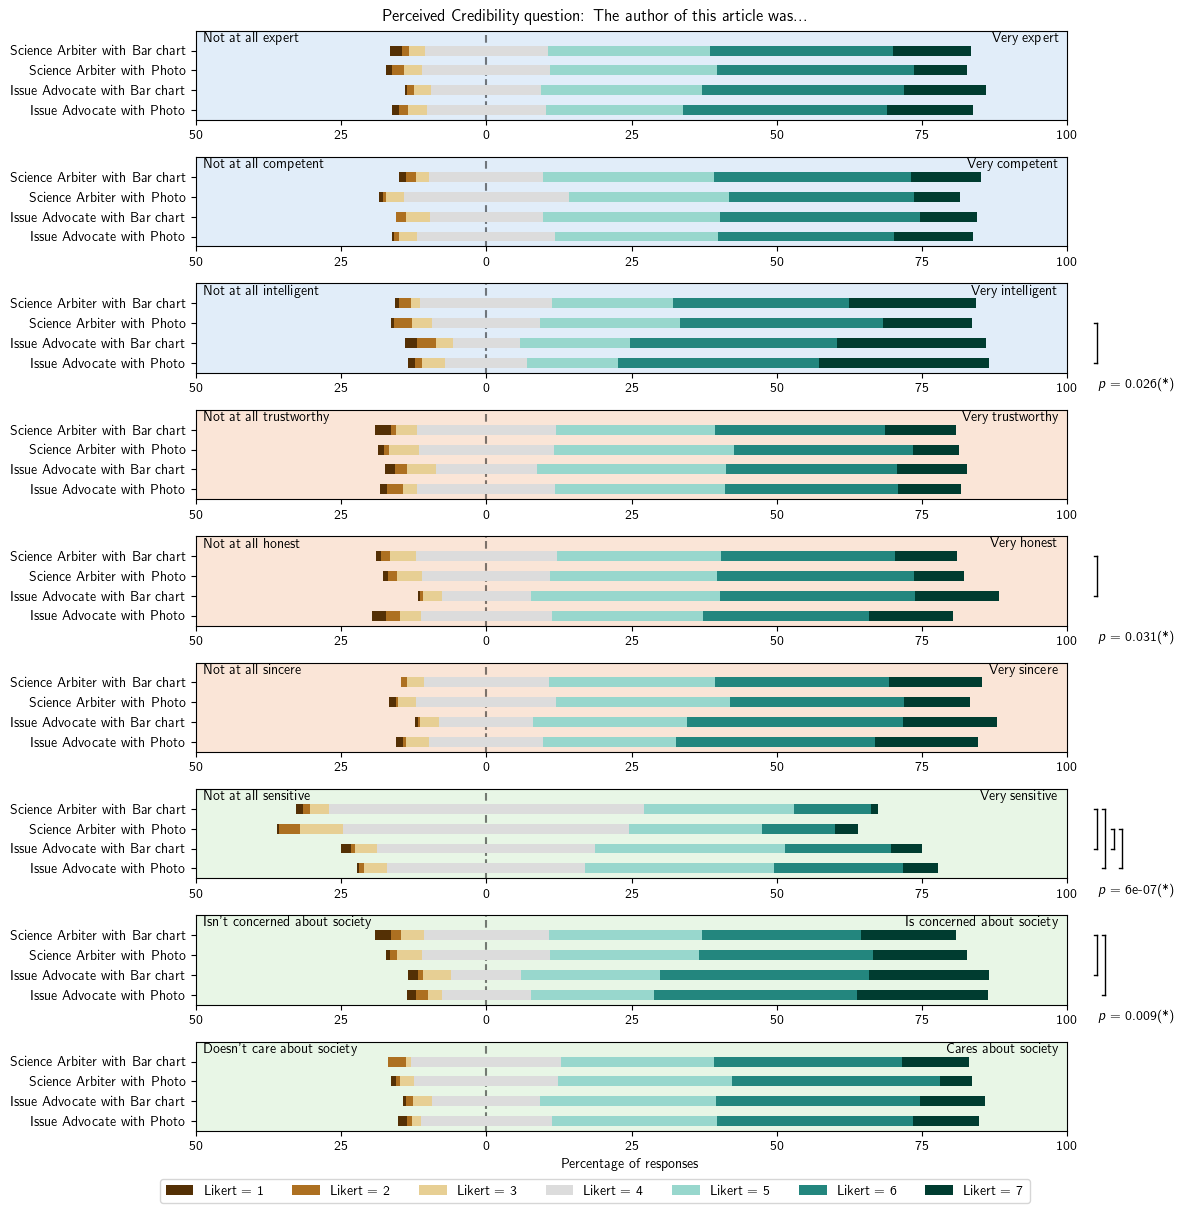

Credibility Cronbach-Alpha: 0.91


In [23]:
# Figure 4: The statements that combine to form the credibility score
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(figwidth, 12))
gs = GridSpec(9, 2, figure=fig, width_ratios=[1, 0.1])

question = "V5"
subqs = [3, 5, 9, 4, 6, 2, 1, 7, 8]#range(1, 10)

cmap = matplotlib.colormaps['BrBG']
colors = ["#ffffff00"] + [cmap(i) for i in np.linspace(0, 1, 7)]
colors[4] = "gainsboro"

for i, v in enumerate(subqs):
    ai = fig.add_subplot(gs[i, 0])

    data = pd.DataFrame([df[f"{question}_{v}"].where(df["Condition"]==c) for c in Conditions.keys()]).T
    data.columns = Conditions.values()

    plot_likert.plot_likert(data, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ax=ai, colors=colors, plot_percentage=True, xtick_interval=25, pad_100=True)
    ai.set_xlim([50, 200])
    ai.set_ylim([-0.5, 4])
    ai.text(0.01, 0.98, questions[f"{question}_{v}"][0], transform=ai.transAxes, ha='left', va='top')
    ai.text(0.99, 0.98, questions[f"{question}_{v}"][1], transform=ai.transAxes, ha='right', va='top')
    ai.get_legend().remove()
    ai.set_xlabel("")
    ai.set_facecolor(credibility_dimension_colors[credibility_dimensions[f"{question}_{v}"]])

    pval = pg.anova(dv=f"{question}_{v}", between="Condition", data=df, detailed=False)['p-unc'].mean()
    if pval < 0.05:
        ai_bracket = fig.add_subplot(gs[i,1])
        pt = pg.pairwise_tests(dv=f"{question}_{v}", between="Condition", data=df, padjust='holm', alternative='two-sided')
        plot_brackets(ai_bracket, ai, pval, pt, column_mapping=Conditions)

handles, labels = ai.get_legend_handles_labels()
fig.legend(handles, [f"Likert = {k}" for k in range(1, 8)], loc='lower center', ncol=7, bbox_to_anchor=(0.5, -0.02))

ai.set_xlabel("Percentage of responses")
plt.suptitle("Perceived Credibility question: The author of this article was...")
plt.tight_layout()
plt.show()

ca = pg.cronbach_alpha(df[[f"{question}_{v}" for v in subqs]])
print(f"Credibility Cronbach-Alpha: {ca[0]:.2f}")


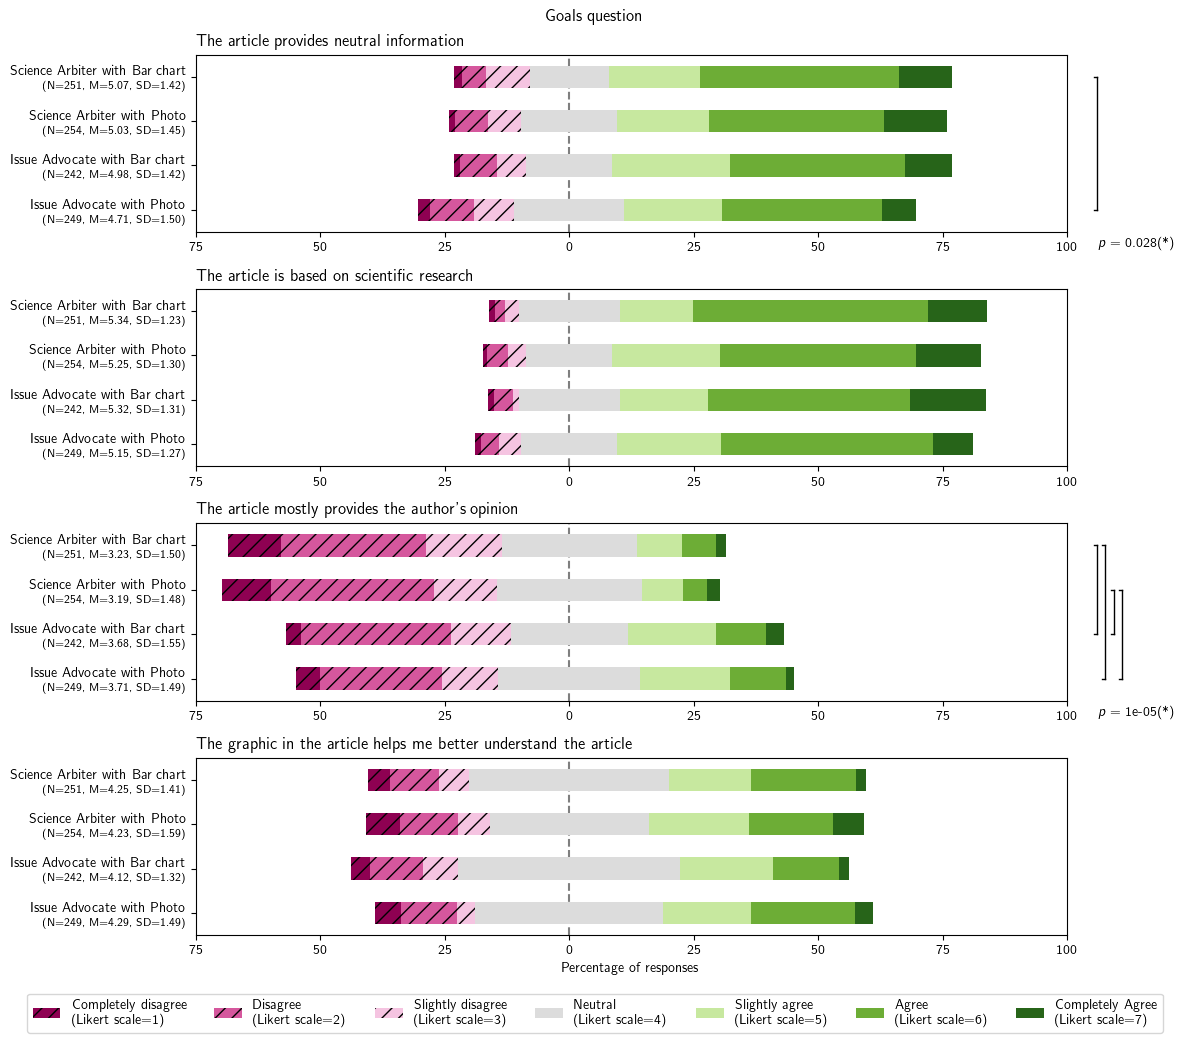

In [24]:
# Figure 5: the goals question
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(figwidth, 10))
gs = GridSpec(4, 2, figure=fig, width_ratios=[1, 0.1])
question = "V7"
subqs = range(1, 5)

titles = ["The article provides neutral information",
          "The article is based on scientific research",
          "The article mostly provides the author's opinion",
          "The graphic in the article helps me better understand the article"]

cmap = matplotlib.colormaps['PiYG']
colors = ["#ffffff00"] + [cmap(i) for i in np.linspace(0, 1, 7)]
colors[4] = "gainsboro"

for i, v in enumerate(subqs):
    ai = fig.add_subplot(gs[i, 0])

    data = pd.DataFrame([df[f"{question}_{v}"].where(df["Condition"]==c) for c in Conditions.keys()]).T
    data.columns = Conditions.values()

    a= plot_likert.plot_likert(data, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ax=ai, colors=colors, plot_percentage=True, xtick_interval=25, pad_100=True)
    add_hatchting(a)

    ai.set_title(questions[f"{question}_{v}"], loc='left')
    ai.legend().remove()
    ai.set_xlabel("")
    ai.set_xlim([25, 200])
    ylabels = ai.get_yticklabels()
    for k, ylabel in enumerate(ylabels):
        statsstr = f"(N={data[ylabel.get_text()].count():d}, M={data[ylabel.get_text()].mean():.2f}, SD={data[ylabel.get_text()].std():.2f})"
        ylabels[k] = f"{ylabel.get_text()}\n"+r"\footnotesize{"+statsstr+"}"
        # ylabels[k] = f"{ylabel.get_text()}\n(M={data[ylabel.get_text()].mean():.2f}, SD={data[ylabel.get_text()].std():.2f})"
    ai.set_yticklabels(ylabels)

    pval = pg.anova(dv=f"{question}_{v}", between="Condition", data=df, detailed=False)['p-unc'].mean()
    if pval < 0.05:
        ai_bracket = fig.add_subplot(gs[i,1])
        pt = pg.pairwise_tests(dv=f"{question}_{v}", between="Condition", data=df, padjust='holm', alternative='two-sided')
        plot_brackets(ai_bracket, ai, pval, pt, column_mapping=Conditions)

ai.set_xlabel("Percentage of responses")

handles, labels = ai.get_legend_handles_labels()
# fig.legend(handles, likert_labels, bbox_to_anchor=(1, .9), loc='upper left', borderaxespad=0.)
fig.legend(handles, likert_labels, bbox_to_anchor=(0.5, -0.05), loc='lower center', ncols=7)

plt.suptitle("Goals question")
plt.tight_layout()
plt.show()

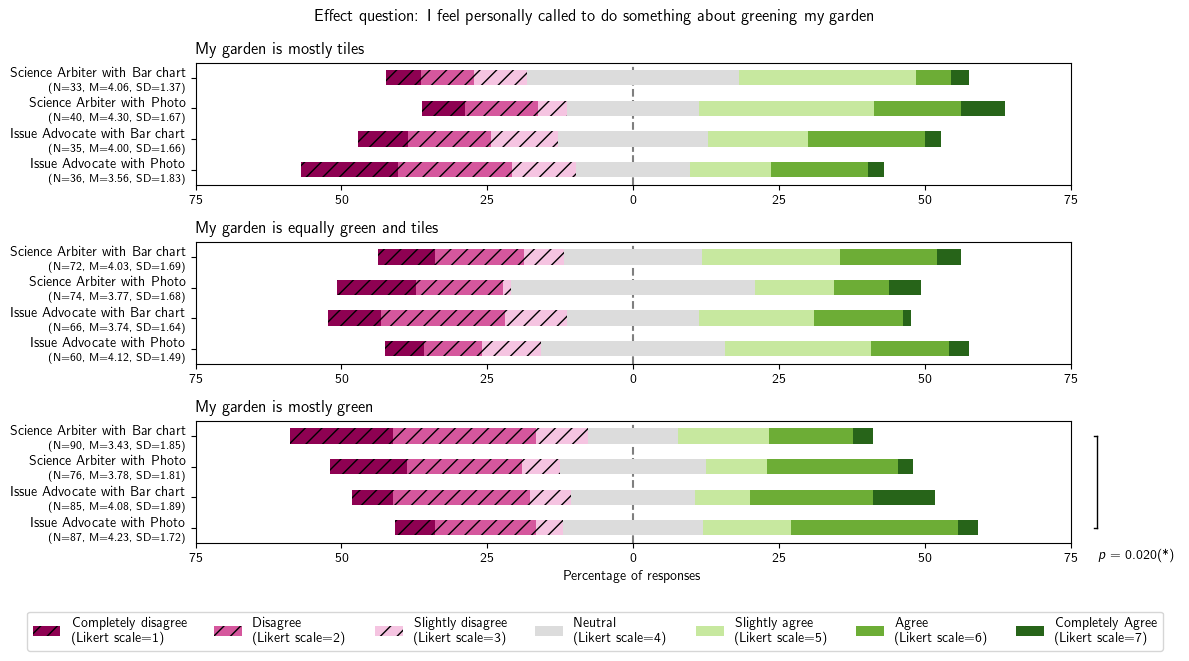

In [25]:
# Figure 6: the action question
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(figwidth, 6))
gs = GridSpec(3, 2, figure=fig, width_ratios=[1, 0.1])

titles = ["My garden is mostly tiles",
          "My garden is equally green and tiles",
          "My garden is mostly green"
]

cmap = matplotlib.colormaps['PiYG']
colors = ["#ffffff00"] + [cmap(i) for i in np.linspace(0, 1, 7)]
colors[4] = "gainsboro"
for i in range(3):
    ai = fig.add_subplot(gs[i, 0])

    data = pd.DataFrame([df["V7_5"].where(df["V6b"]==i).where(df["Condition"]==c) for c in Conditions.keys()]).T
    data.columns = Conditions.values()

    a= plot_likert.plot_likert(data, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ax=ai, colors=colors, plot_percentage=True, xtick_interval=25, pad_100=True)
    add_hatchting(a)

    ai.set_title(titles[i], loc='left')
    ai.legend().remove()
    ai.set_xlabel("")
    ai.set_xlim([25, 175])
    ylabels = ai.get_yticklabels()
    for k, ylabel in enumerate(ylabels):
        statsstr = f"(N={data[ylabel.get_text()].count():d}, M={data[ylabel.get_text()].mean():.2f}, SD={data[ylabel.get_text()].std():.2f})"
        ylabels[k] = f"{ylabel.get_text()}\n"+r"\footnotesize{"+statsstr+"}"
    ai.set_yticklabels(ylabels)

    pval = pg.anova(dv="V7_5", between="Condition", data=df.where(df["V6b"]==i), detailed=False)['p-unc'].mean()
    if pval < 0.05:
        ai_bracket = fig.add_subplot(gs[i,1])
        pt = pg.pairwise_tests(dv="V7_5", between="Condition", data=df.where(df["V6b"]==i), padjust='holm', alternative='two-sided')
        plot_brackets(ai_bracket, ai, pval, pt, column_mapping=Conditions)

ai.set_xlabel("Percentage of responses")

handles, labels = ai.get_legend_handles_labels()
fig.legend(handles, likert_labels, bbox_to_anchor=(0.5, -0.1), loc='lower center', ncols=7)

plt.suptitle("Effect question: I feel personally called to do something about greening my garden")
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                V5_mean   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     31.60
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           1.63e-19
Time:                        11:54:28   Log-Likelihood:                -1276.1
No. Observations:                 996   AIC:                             2560.
Df Residuals:                     992   BIC:                             2580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

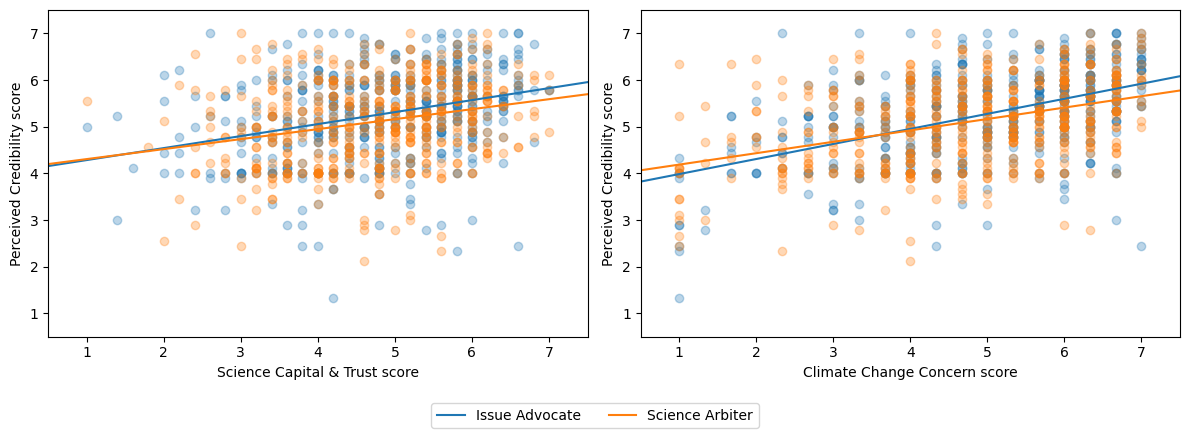

In [42]:
# Figure 7: correlation between SCT and CCC with Perceived Credibility
import statsmodels.formula.api as smf
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(figwidth, 4))
gs = GridSpec(1, 2, figure=fig, width_ratios=[1, 1])

condition = "Condition_text"
condition_dict = globals()[condition]
xvec = np.linspace(0.5, 7.5, 100)
for j, var in enumerate(["SCT", "CCC"]):
    ai = fig.add_subplot(gs[0, j])
    for k, c in enumerate(condition_dict.keys()):
        x = df[var].where(df[condition]==c)
        y = df["V5_mean"].where(df[condition]==c)
        ai.plot(x, y, 'o', alpha=0.3, color=f"C{k}", label="_nolegend_")
    ai.set_xlabel(f"{named_labels[var]} score")
    ai.set_ylabel(f"{named_labels["V5_mean"]} score")
    ai.set_xlim([xvec[0], xvec[-1]])
    ai.set_ylim([0.5, 7.5])

    formula = f'V5_mean ~ {var} * {condition}'
    model = smf.ols(formula, data=df).fit()
    print(model.summary())

    for cond in df['Condition_text'].cat.categories:
        pred_df = pd.DataFrame({var: xvec, 'Condition_text': cond})
        y_fit = model.predict(pred_df)
        ai.plot(xvec, y_fit, label=Condition_text[cond])

    pval = pg.ancova(dv="V5_mean", between=condition, covar=var, data=df)
    print(pval)

handles, labels = ai.get_legend_handles_labels()
fig.legend(labels, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
plt.show()

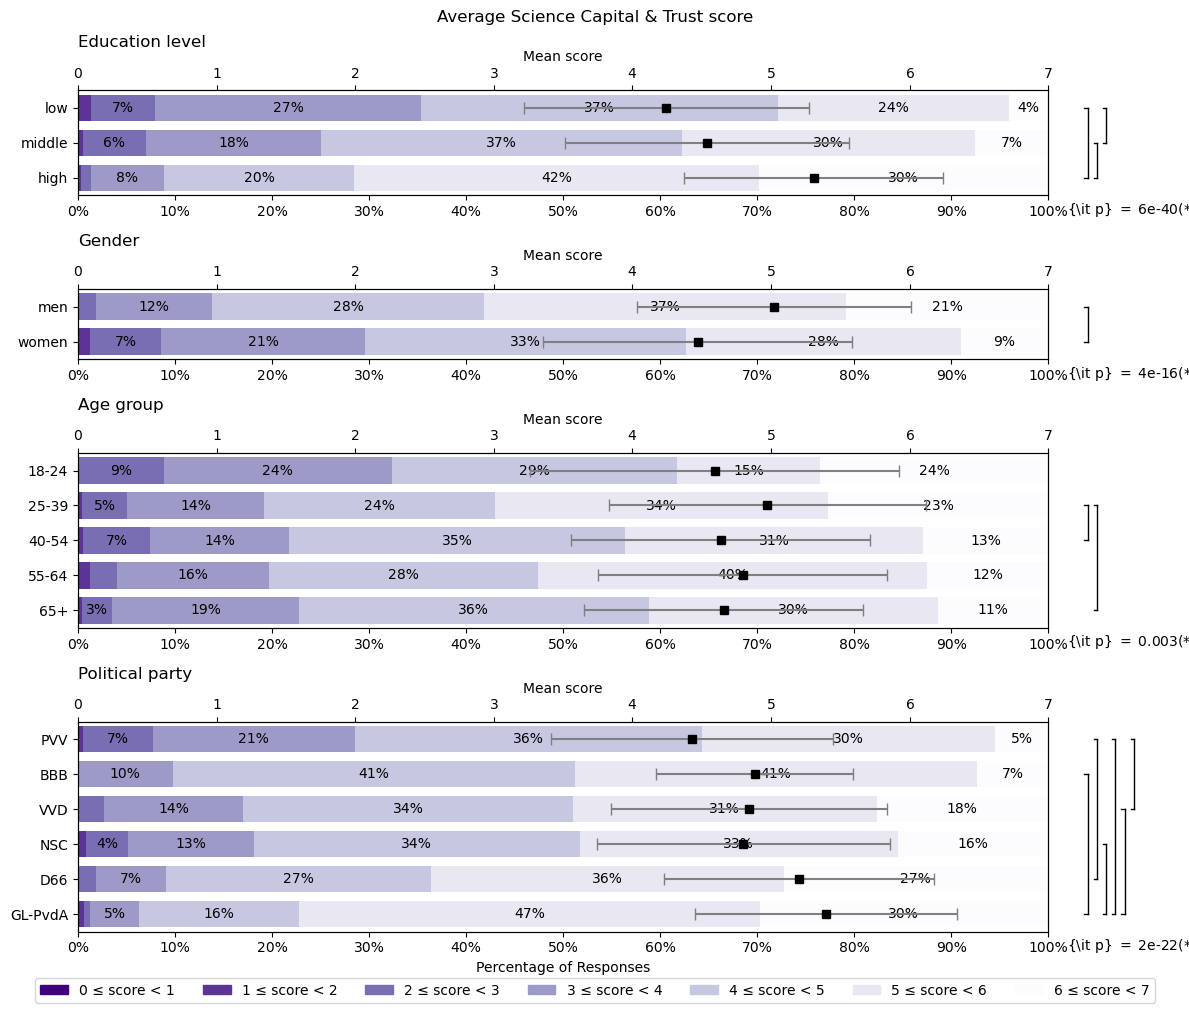

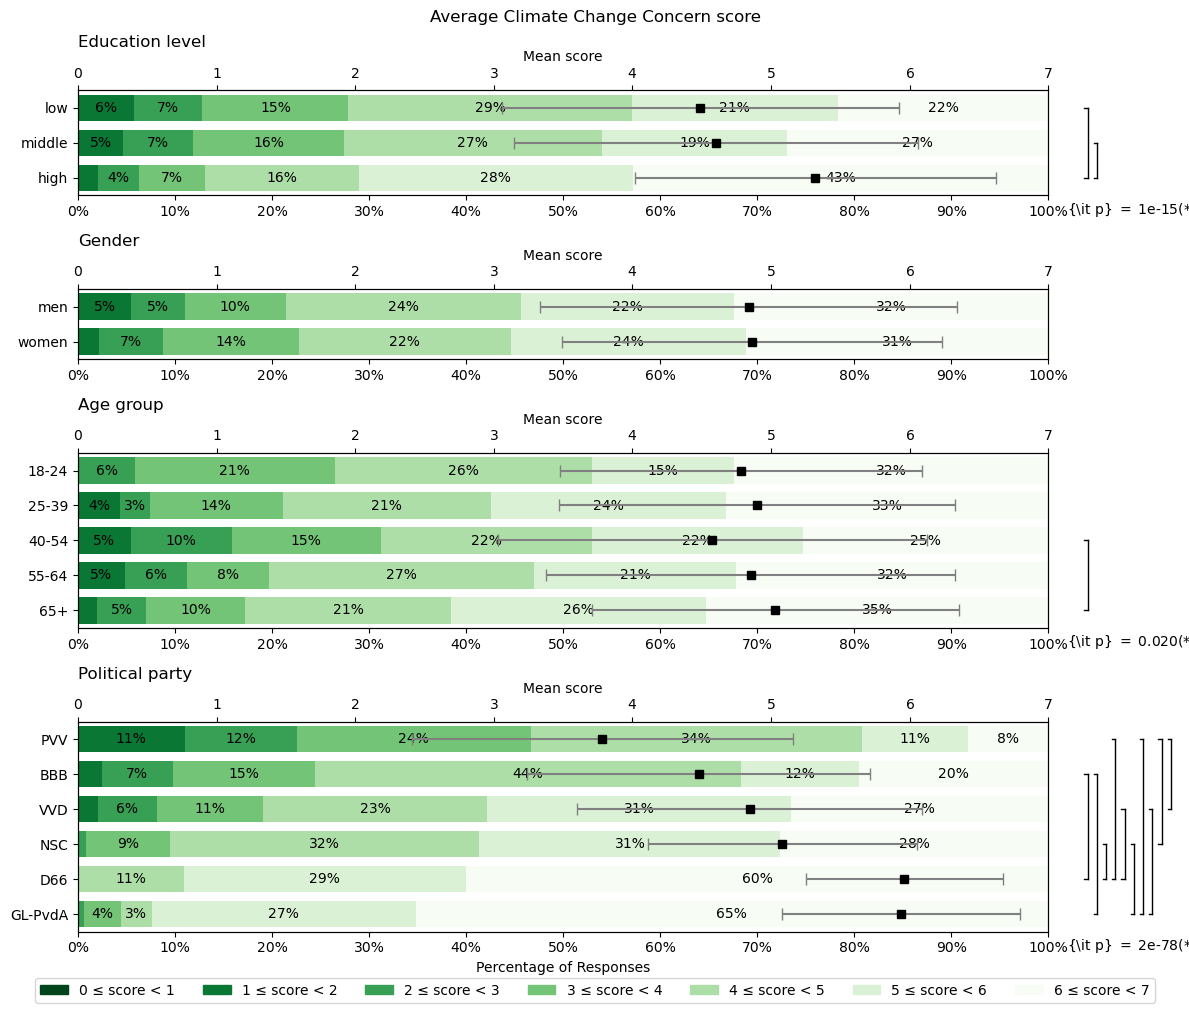

In [27]:
# Create Appendix C Figures: average sct and ccc figure
plt.rcParams['text.usetex'] = False
for question, colorname in [("SCT", "Purples"), ("CCC", "Greens")]:
    colormap=matplotlib.colormaps[colorname](np.linspace(1, 0, 7))
    fig = plt.figure(figsize=(figwidth, 10))
    gs = GridSpec(4, 2, figure=fig, height_ratios=[3, 2, 5, 6], width_ratios=[1, 0.1])

    for i, cond_col, condition_labels, title_before in [
        (0, "OPLEID_HER", ["laag", "midden", "hoog"], "Education level"),
        (1, "GESLACHT2", ["Man", "Vrouw"], "Gender"),
        (2, "LFT5", ['18-24', '25-39', '40-54', '55-64', '65',], "Age group"),
        (3, "IOPOL2023", party_order, "Political party"),]:

        ai = fig.add_subplot(gs[i, 0])

        data = pd.DataFrame(df[question]).where(df[cond_col] == condition_labels[0])
        data.columns = [cat_translations[condition_labels[0]]]
        for condition in condition_labels[1:]:
            data[cat_translations[condition]] = df[question].where(df[cond_col] == condition)

        plot_scorebars(data, ai, colormap)
        ai.set_xlabel('')
        ai.set_title(f"{title_before}", transform=ai.transAxes, loc='left')

        plt.suptitle(f"Average {named_labels[question]} score")

        pval = pg.anova(dv=question, between=cond_col, data=df, detailed=False)['p-unc'].mean()
        if pval < 0.05:
            ai_bracket = fig.add_subplot(gs[i, 1])
            pt = pg.pairwise_tests(dv=question, between=cond_col, data=df, padjust='holm', alternative='two-sided')
            plot_brackets(ai_bracket, ai, pval, pt, column_mapping=cat_translations)

    ai.set_xlabel("Percentage of Responses")

    labels = [f"{i} ≤ score < {i+1}" for i in range(7)]
    fig.legend([matplotlib.patches.Patch(color=colormap[i], label=f"{i+1}") for i in range(7)], labels, loc='lower center', ncol=7, bbox_to_anchor=(0.5, -0.02))
    plt.tight_layout()
    plt.show()

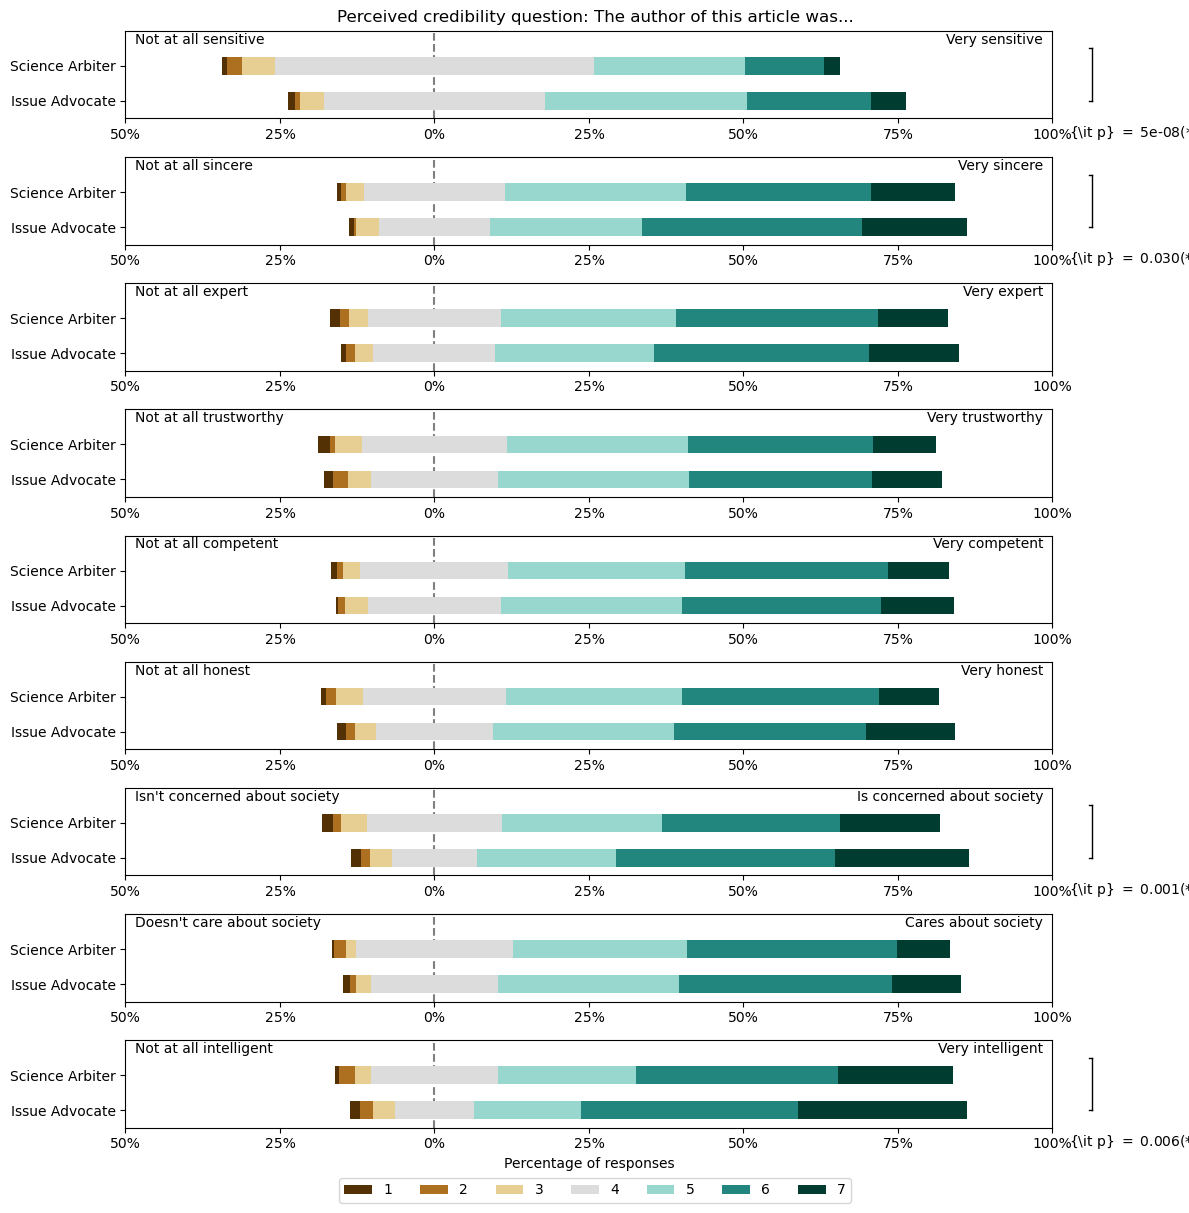

Credibility Cronbach-Alpha: 0.91


In [28]:
# Create Figure 3 for text-only condition (backup)
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(figwidth, 12))
gs = GridSpec(9, 2, figure=fig, width_ratios=[1, 0.1])

question = "V5"
subqs = range(1, 10)

cmap = matplotlib.colormaps['BrBG']
colors = ["#ffffff00"] + [cmap(i) for i in np.linspace(0, 1, 7)]
colors[4] = "gainsboro"

for i, v in enumerate(subqs):
    ai = fig.add_subplot(gs[i, 0])

    data = pd.DataFrame([df[f"{question}_{v}"].where(df["Condition_text"]==c) for c in ['SA', 'IA']]).T
    # data.columns = ['Logical scientific', 'Advocacy']
    data.columns = ['Science Arbiter', 'Issue Advocate']

    plot_likert.plot_likert(data, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ax=ai, colors=colors, plot_percentage=True, xtick_interval=25, pad_100=True)
    ai.set_xlim([50, 200])
    ai.set_ylim([-0.5, 2])
    ai.text(0.01, 0.98, questions[f"{question}_{v}"][0], transform=ai.transAxes, ha='left', va='top')
    ai.text(0.99, 0.98, questions[f"{question}_{v}"][1], transform=ai.transAxes, ha='right', va='top')
    ai.get_legend().remove()
    ai.set_xlabel("")

    pval = pg.anova(dv=f"{question}_{v}", between="Condition_text", data=df, detailed=False)['p-unc'].mean()
    if pval < 0.05:
        ai_bracket = fig.add_subplot(gs[i,1])
        pt = pg.pairwise_tests(dv=f"{question}_{v}", between="Condition_text", data=df, padjust='holm', alternative='two-sided')
        plot_brackets(ai_bracket, ai, pval, pt, column_mapping=Conditions)

handles, labels = ai.get_legend_handles_labels()
fig.legend(handles, [str(k) for k in range(1, 8)], loc='lower center', ncol=7, bbox_to_anchor=(0.5, -0.02))

ai.set_xlabel("Percentage of responses")
plt.suptitle("Perceived credibility question: The author of this article was...")
plt.tight_layout()
plt.show()

ca = pg.cronbach_alpha(df[[f"{question}_{v}" for v in subqs]])
print(f"Credibility Cronbach-Alpha: {ca[0]:.2f}")


4.3193445318761285e-19


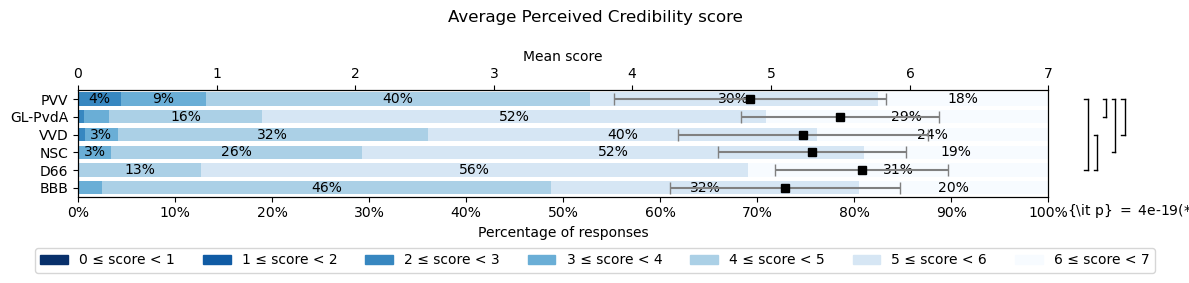

In [30]:
# Create Extra Figure: credibility score figure per political party
plt.rcParams['text.usetex'] = False
cred_colors=matplotlib.colormaps['Blues'](np.linspace(1, 0, 7))
fig = plt.figure(figsize=(figwidth, 2.5))
gs = GridSpec(1, 2, figure=fig, width_ratios=[1, 0.1])

parties = ["PVV", "GroenLinks-PvdA", "VVD", "NSC", "D66", "BBB"]
ai = fig.add_subplot(gs[0, 0])

data = pd.DataFrame([df["V5_mean"].where(df["IOPOL2023"] == party) for party in parties]).T
data.columns = [cat_translations[party] for party in parties]

plot_scorebars(data, ai, cred_colors)

# ai.set_title(f"{Conditions[c]}", transform=ai.transAxes, loc='left')
# plt.suptitle(f"Average {named_labels["V5_mean"]} score")

pval = pg.anova(dv="V5_mean", between="IOPOL2023", data=df, detailed=False)['p-unc'].mean()
print(pval)
if pval < 0.05:
    ai_bracket = fig.add_subplot(gs[0,1])
    pt = pg.pairwise_tests(dv="V5_mean", between="IOPOL2023", data=df, padjust='holm', alternative='two-sided')
    plot_brackets(ai_bracket, ai, pval, pt, column_mapping=cat_translations)

cred_labels = [f"{i} ≤ score < {i+1}" for i in range(7)]
fig.legend([matplotlib.patches.Patch(color=cred_colors[i], label=f"{i+1}") for i in range(7)], cred_labels, loc='lower center', ncol=7, bbox_to_anchor=(0.5, -0.1))
plt.suptitle(f"Average {named_labels["V5_mean"]} score")

plt.tight_layout()
plt.show()

4.91744553491832e-06
3.5053725603168013e-12


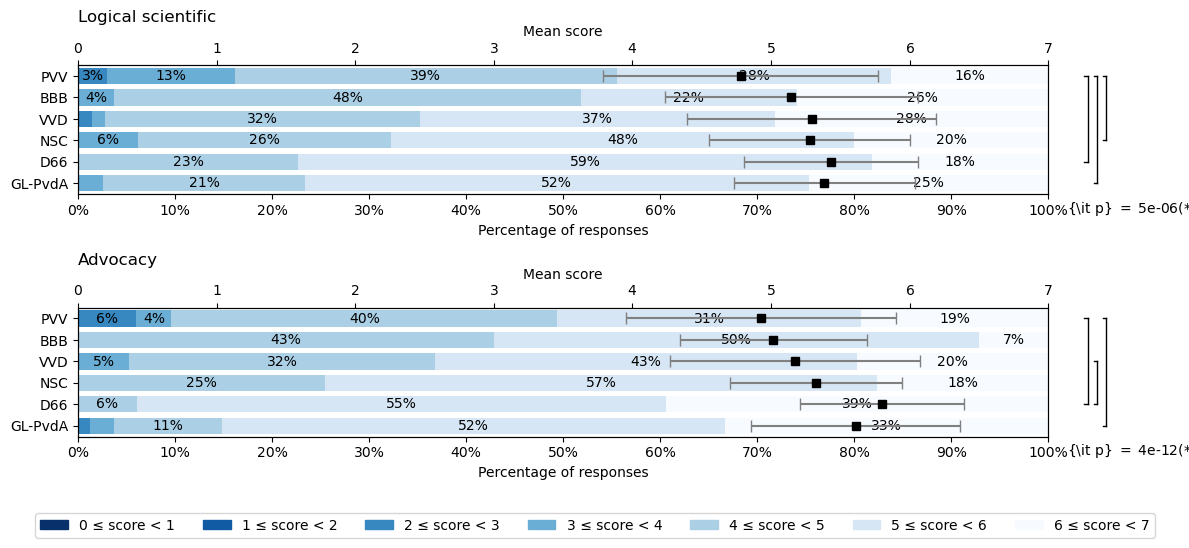

In [ ]:
# Create Extra Figure: credibility score figure per political party
plt.rcParams['text.usetex'] = False
cred_colors=matplotlib.colormaps['Blues'](np.linspace(1, 0, 7))
fig = plt.figure(figsize=(figwidth, 5))
gs = GridSpec(2, 2, figure=fig, width_ratios=[1, 0.1])

titles = ["Logical scientific", "Advocacy"]
for i, c in enumerate([['A', 'C'], ['B', 'D']]):
    ai = fig.add_subplot(gs[i, 0])

    data = pd.DataFrame([df["V5_mean"].where(df["Condition"].isin(c)).where(df["IOPOL2023"] == party) for party in party_order]).T
    data.columns = [cat_translations[party] for party in party_order]

    plot_scorebars(data, ai, cred_colors)

    ai.set_title(f"{titles[i]}", transform=ai.transAxes, loc='left')
    # plt.suptitle(f"Average {named_labels["V5_mean"]} score")

    pval = pg.anova(dv="V5_mean", between="IOPOL2023", data=df.where(df["Condition"].isin(c)), detailed=False)['p-unc'].mean()
    if pval < 0.05:
        ai_bracket = fig.add_subplot(gs[i,1])
        pt = pg.pairwise_tests(dv="V5_mean", between="IOPOL2023", data=df.where(df["Condition"].isin(c)), padjust='holm', alternative='two-sided')
        plot_brackets(ai_bracket, ai, pval, pt, column_mapping=cat_translations)

cred_labels = [f"{i} ≤ score < {i+1}" for i in range(7)]
fig.legend([matplotlib.patches.Patch(color=cred_colors[i], label=f"{i+1}") for i in range(7)], cred_labels, loc='lower center', ncol=7, bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()

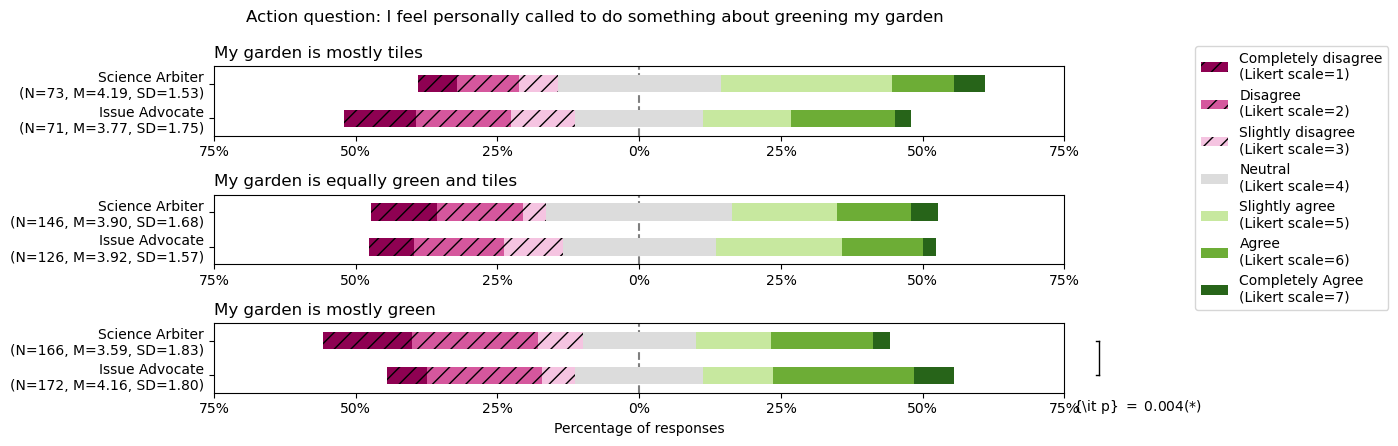

In [33]:
# Create effect question with text condition only
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(figwidth, 4.5))
gs = GridSpec(3, 2, figure=fig, width_ratios=[1, 0.1])

titles = ["My garden is mostly tiles",
          "My garden is equally green and tiles",
          "My garden is mostly green"
]

cmap = matplotlib.colormaps['PiYG']
colors = ["#ffffff00"] + [cmap(i) for i in np.linspace(0, 1, 7)]
colors[4] = "gainsboro"
for i in range(3):
    ai = fig.add_subplot(gs[i, 0])

    data = pd.DataFrame([df["V7_5"].where(df["V6b"]==i).where(df["Condition_text"]==c) for c in ['SA', 'IA']]).T
    data.columns = ['Science Arbiter', 'Issue Advocate']

    a= plot_likert.plot_likert(data, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ax=ai, colors=colors, plot_percentage=True, xtick_interval=25, pad_100=True)
    add_hatchting(a)

    ai.set_title(titles[i], loc='left')
    ai.legend().remove()
    ai.set_xlabel("")
    ai.set_xlim([25, 175])
    ylabels = ai.get_yticklabels()
    for k, ylabel in enumerate(ylabels):
        ylabels[k] = f"{ylabel.get_text()}\n(N={data[ylabel.get_text()].count():d}, M={data[ylabel.get_text()].mean():.2f}, SD={data[ylabel.get_text()].std():.2f})"
    ai.set_yticklabels(ylabels)

    pval = pg.anova(dv="V7_5", between="Condition_text", data=df.where(df["V6b"]==i), detailed=False)['p-unc'].mean()
    if pval < 0.05:
        ai_bracket = fig.add_subplot(gs[i,1])
        pt = pg.pairwise_tests(dv="V7_5", between="Condition_text", data=df.where(df["V6b"]==i), padjust='holm', alternative='two-sided')
        plot_brackets(ai_bracket, ai, pval, pt, column_mapping=Conditions)

ai.set_xlabel("Percentage of responses")

handles, labels = ai.get_legend_handles_labels()
fig.legend(handles, likert_labels, bbox_to_anchor=(1, .9), loc='upper left', borderaxespad=0.)

plt.suptitle("Action question: I feel personally called to do something about greening my garden")
plt.tight_layout()
plt.show()

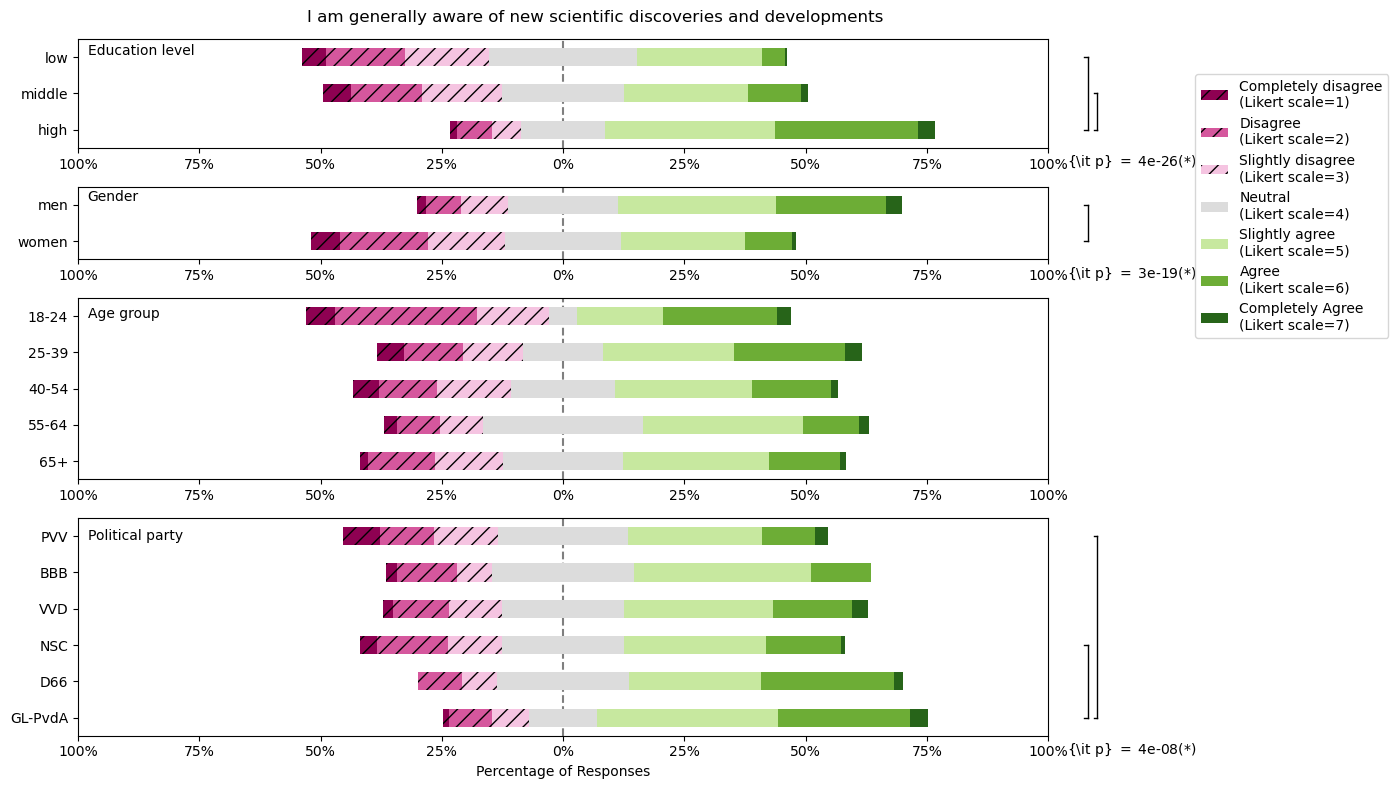

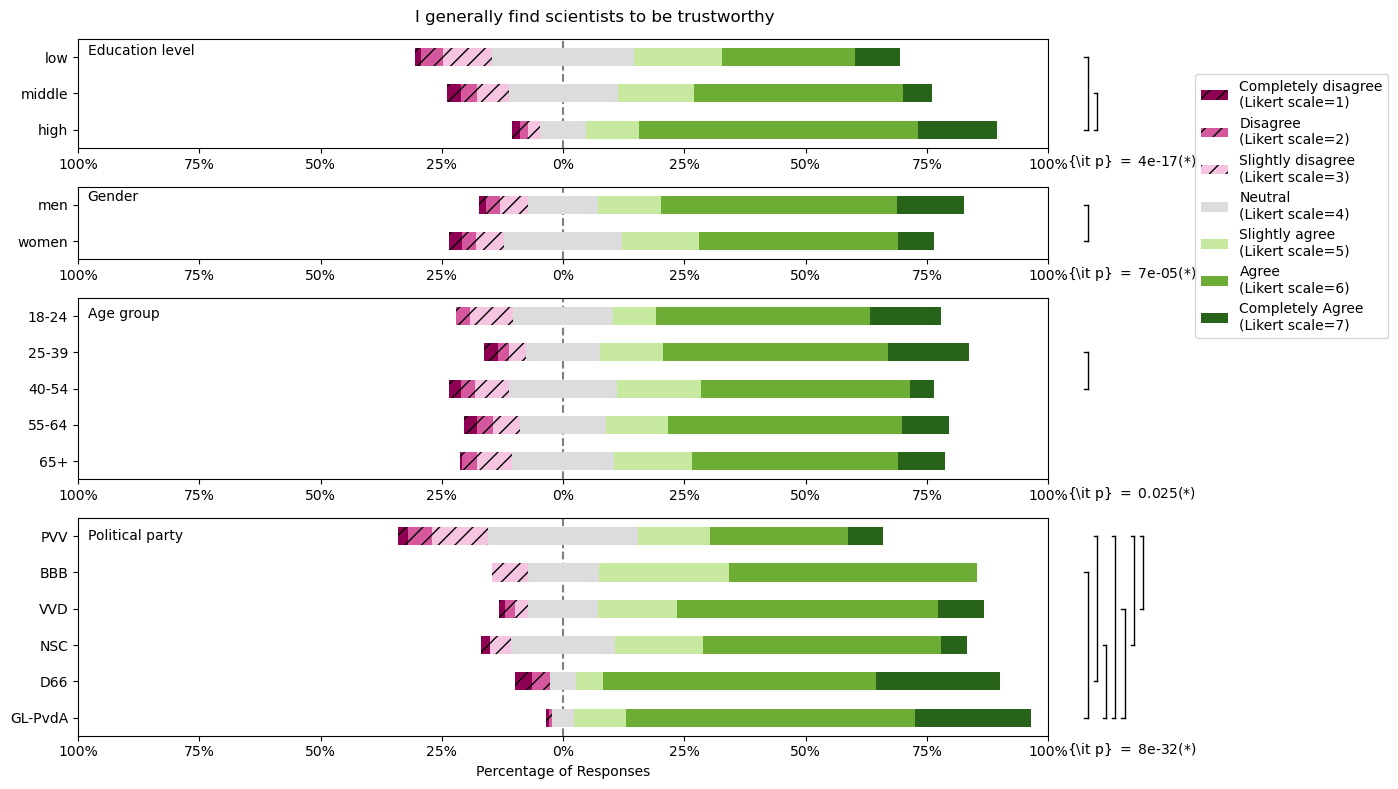

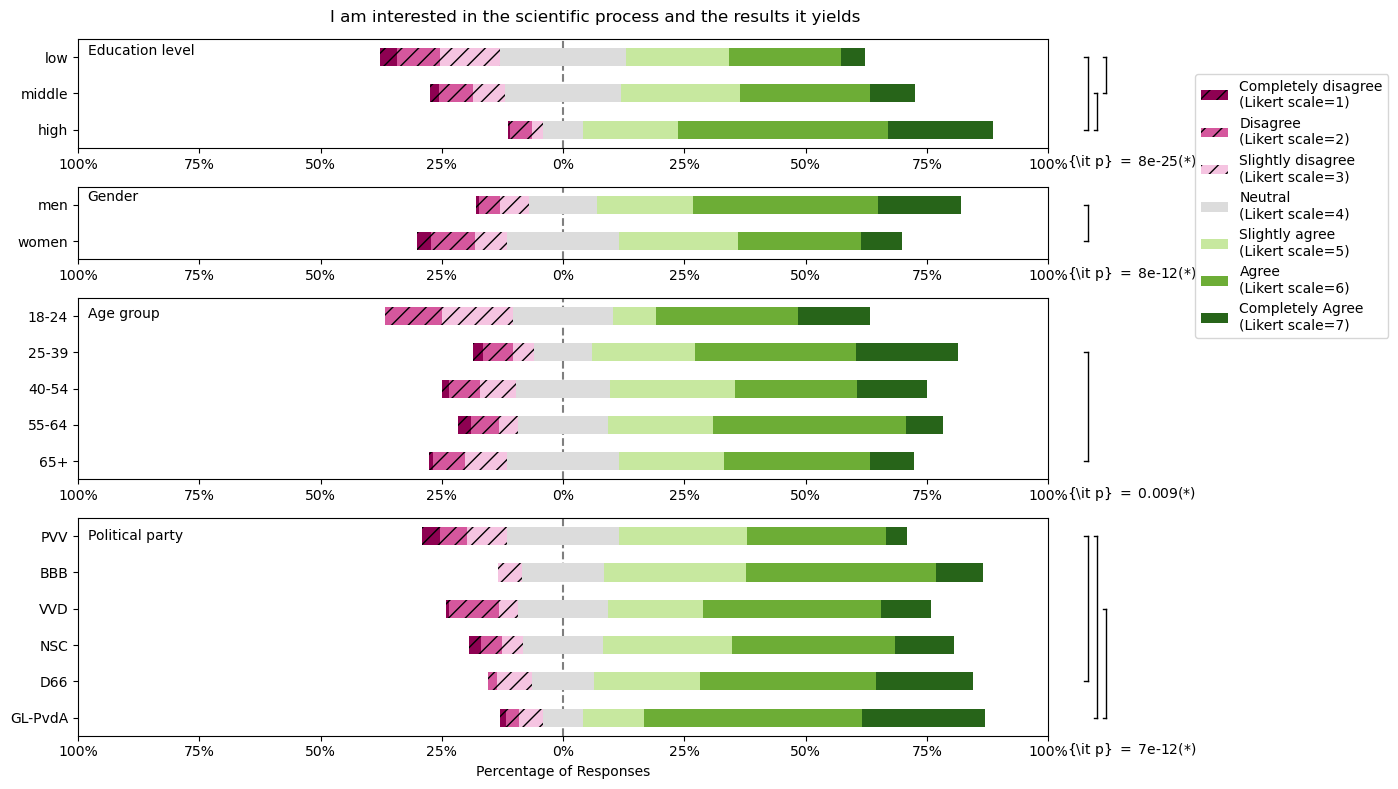

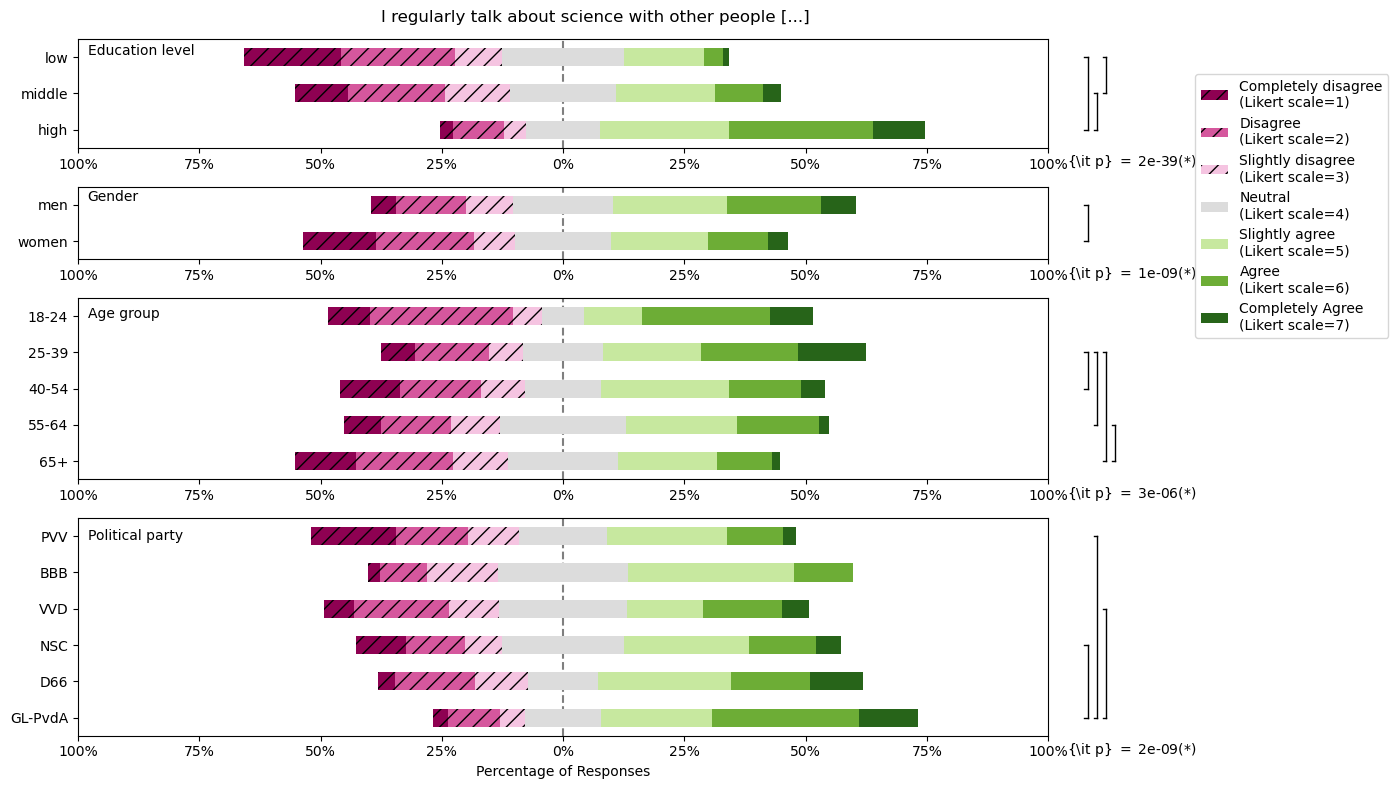

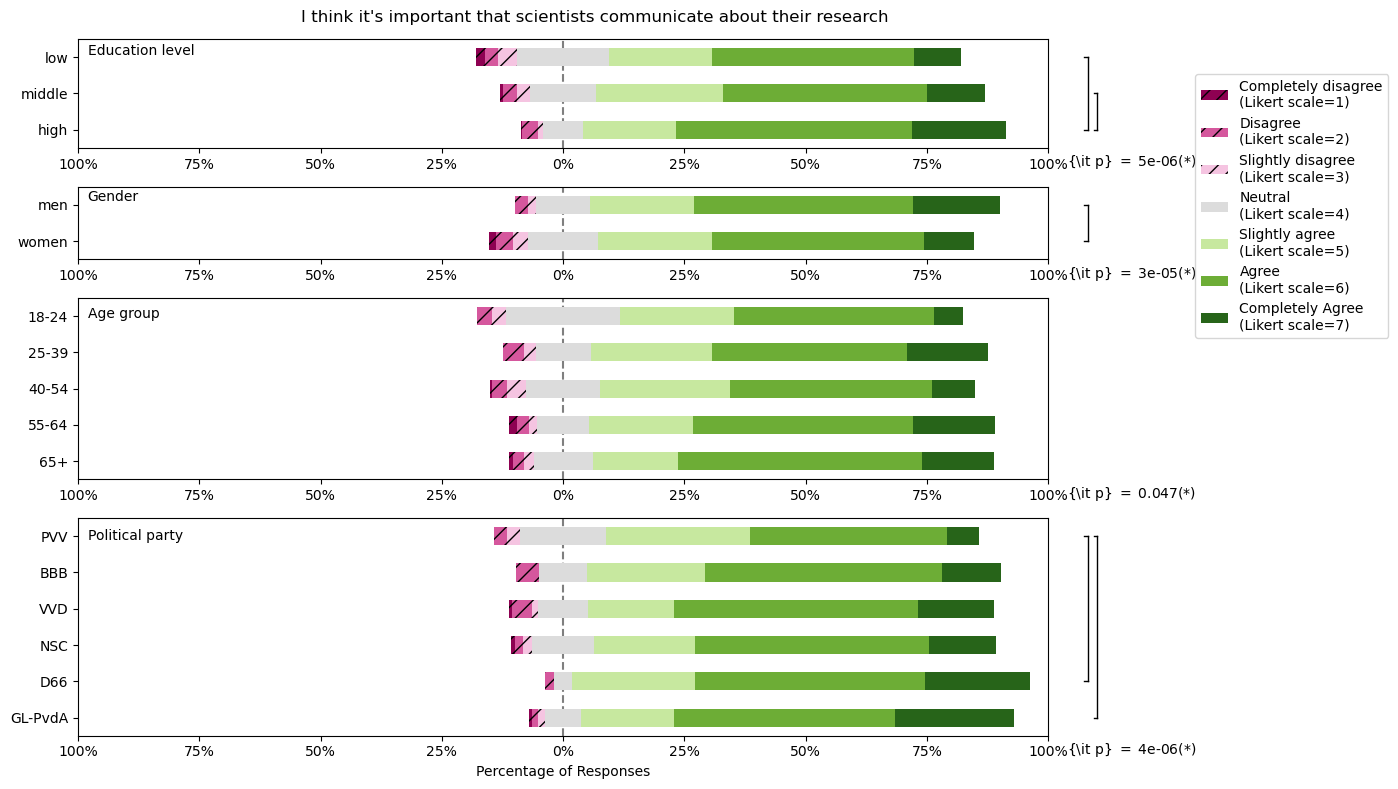

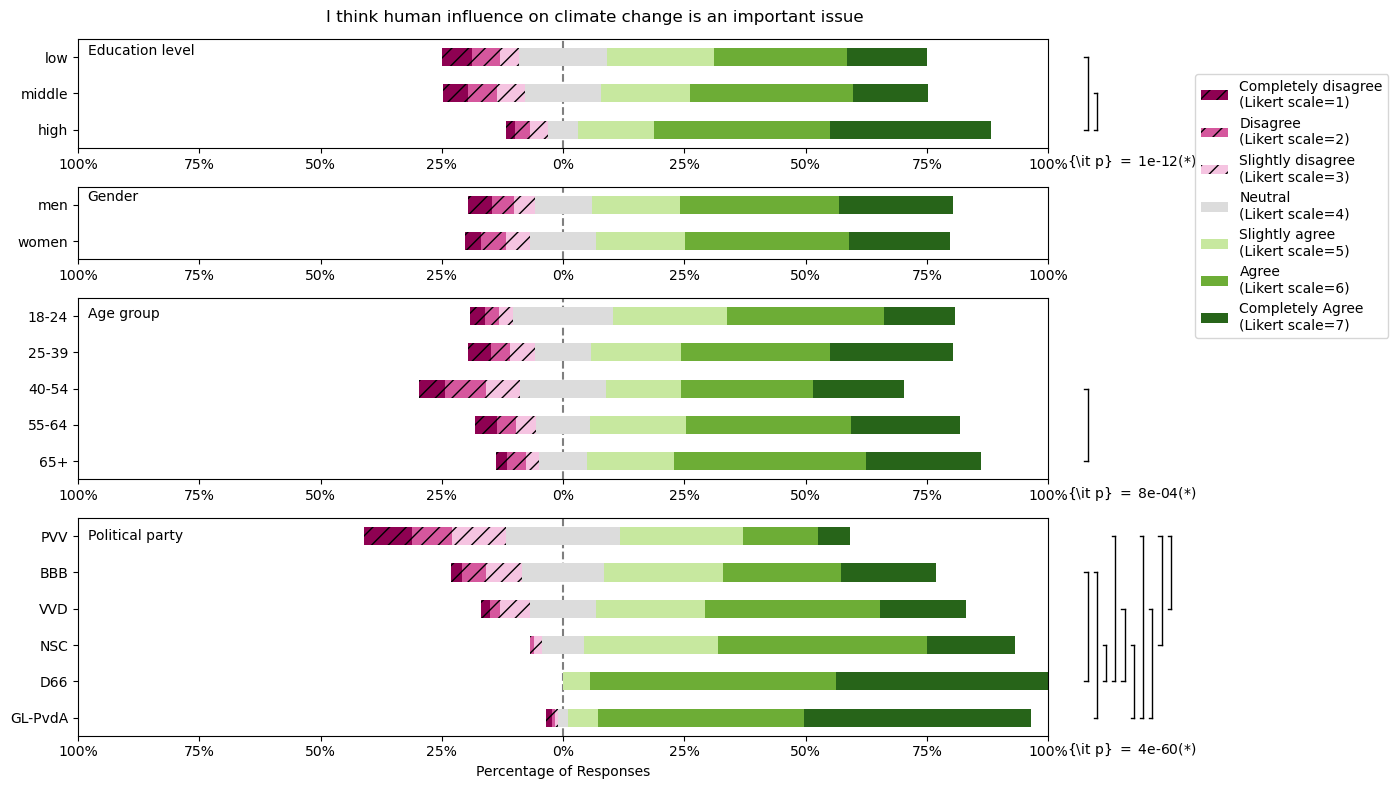

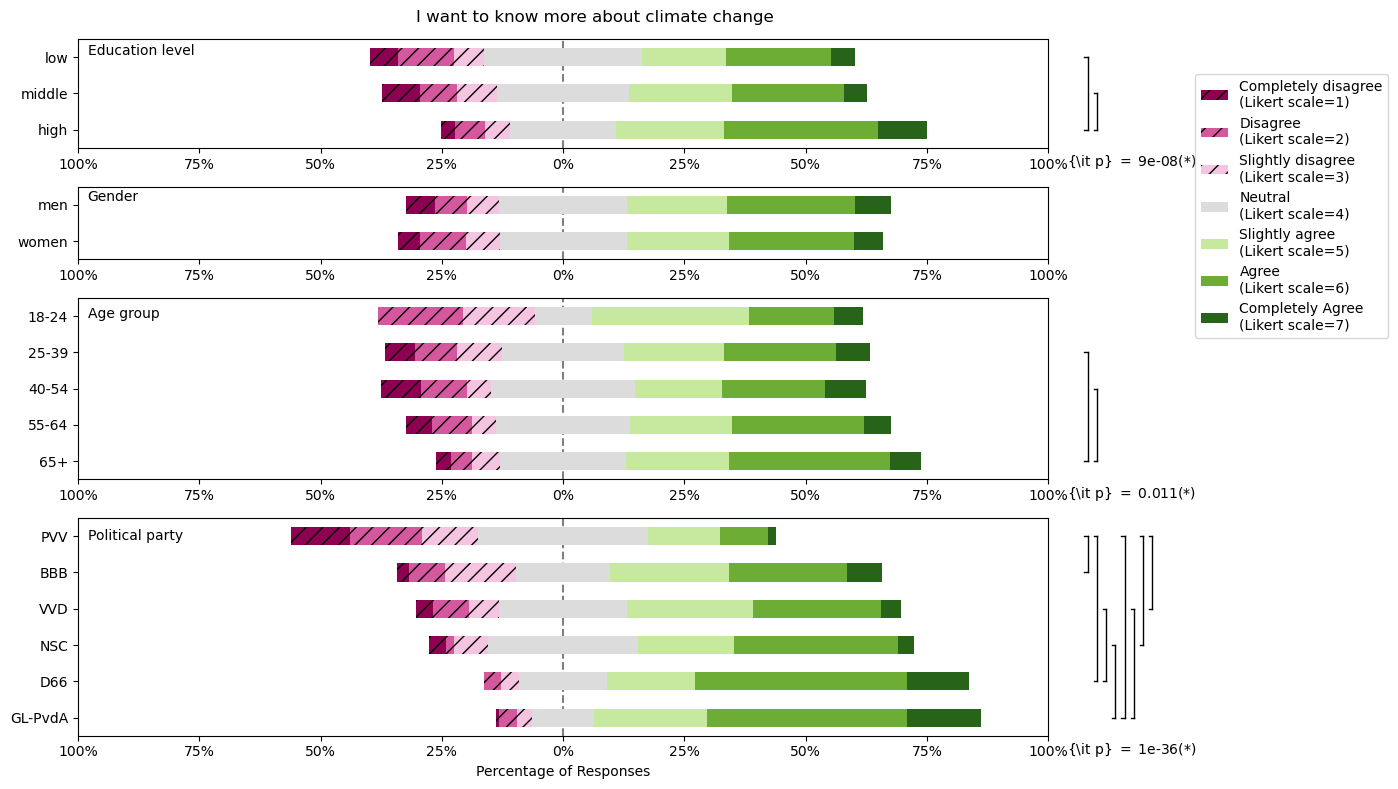

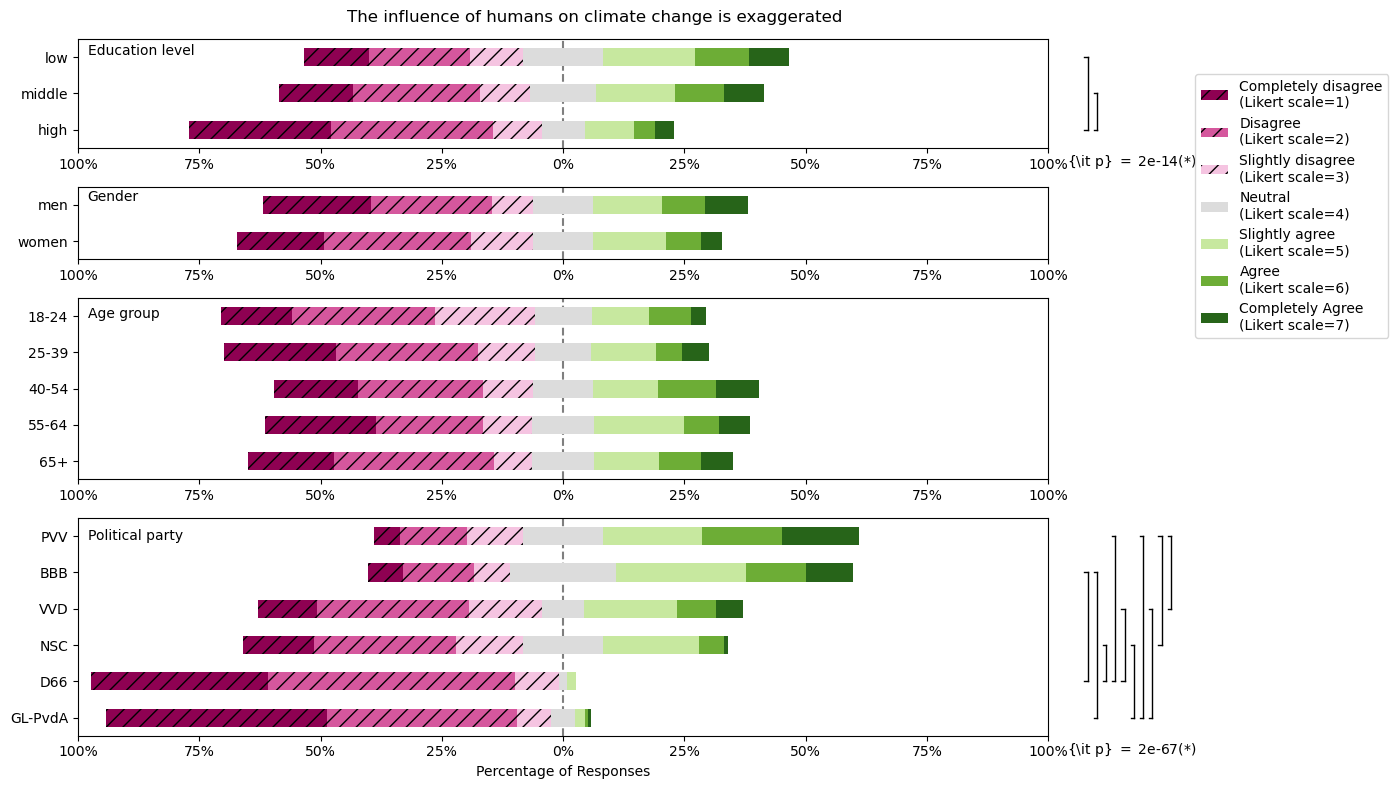

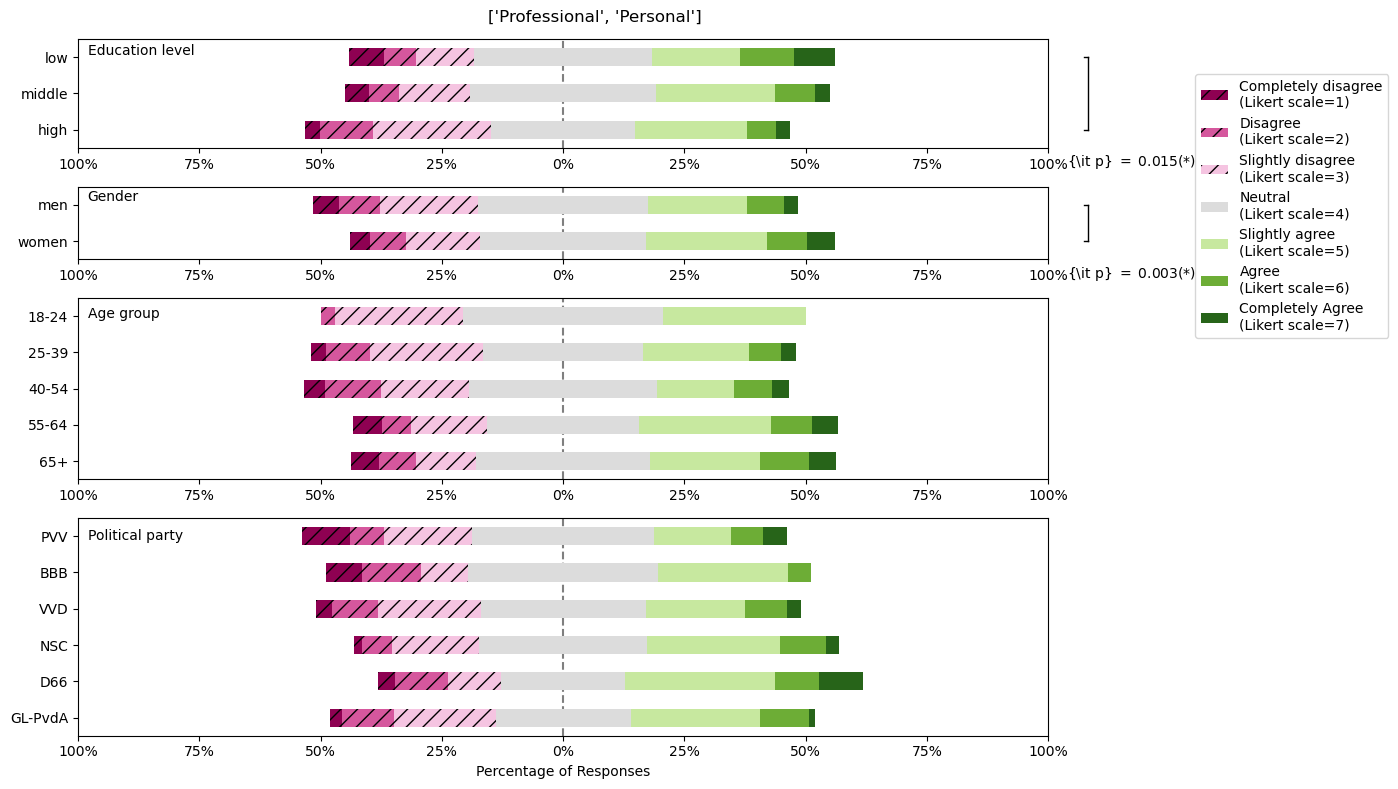

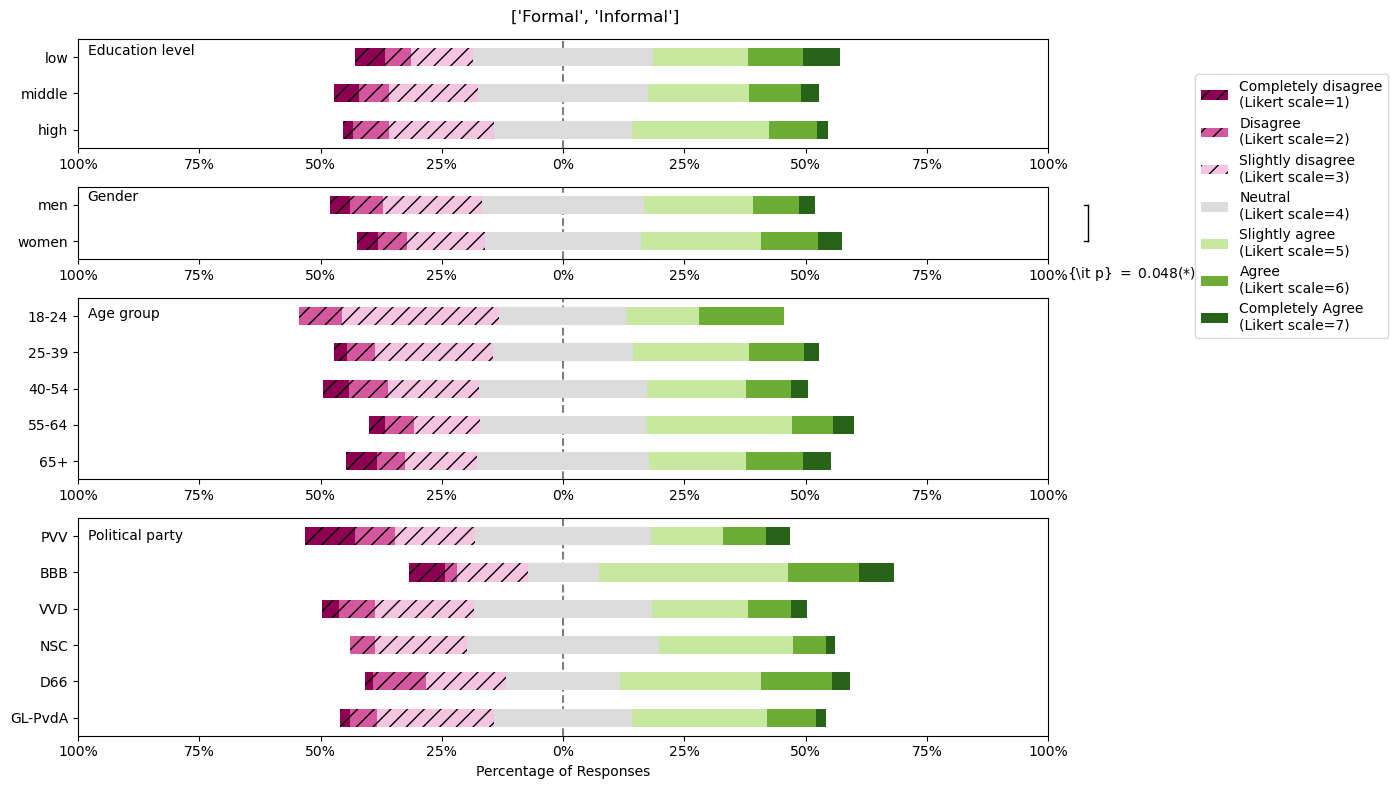

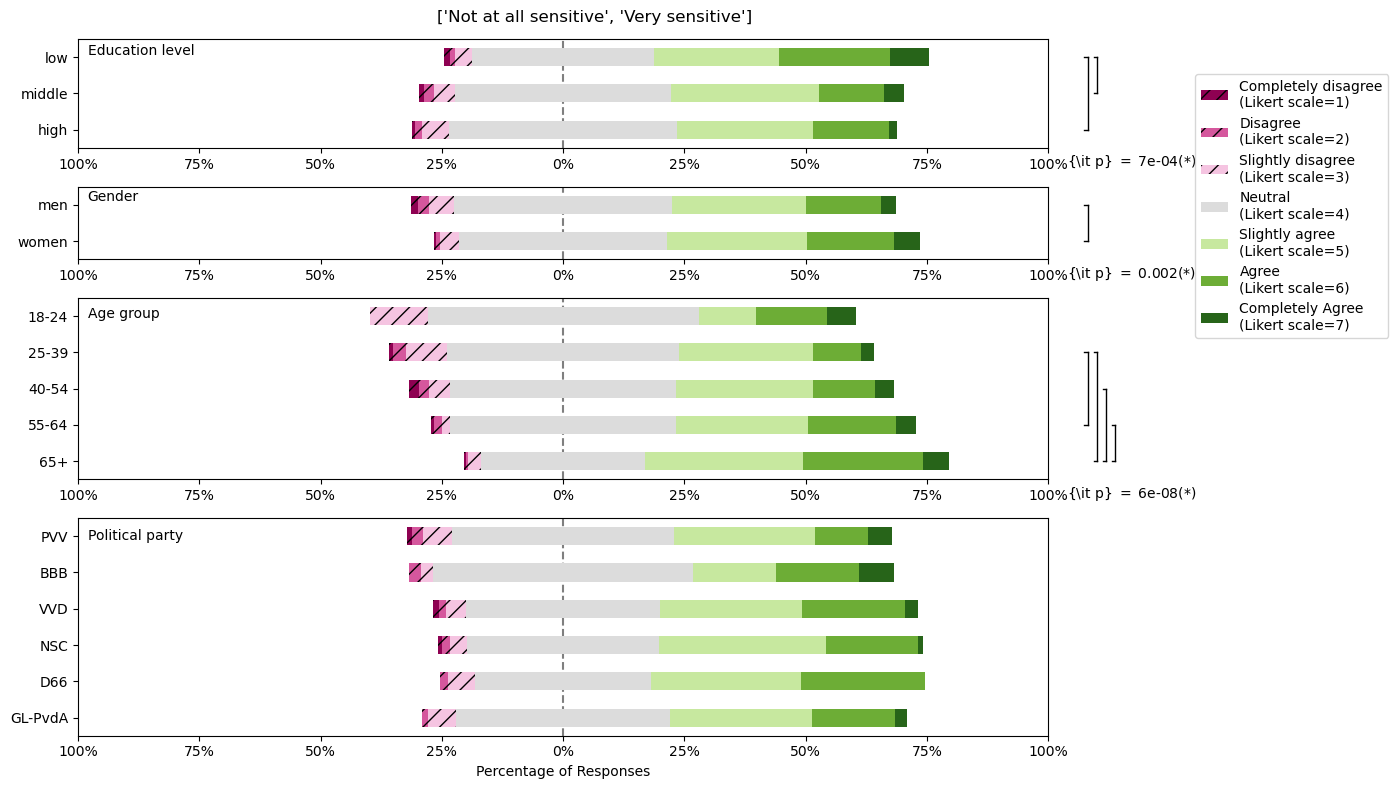

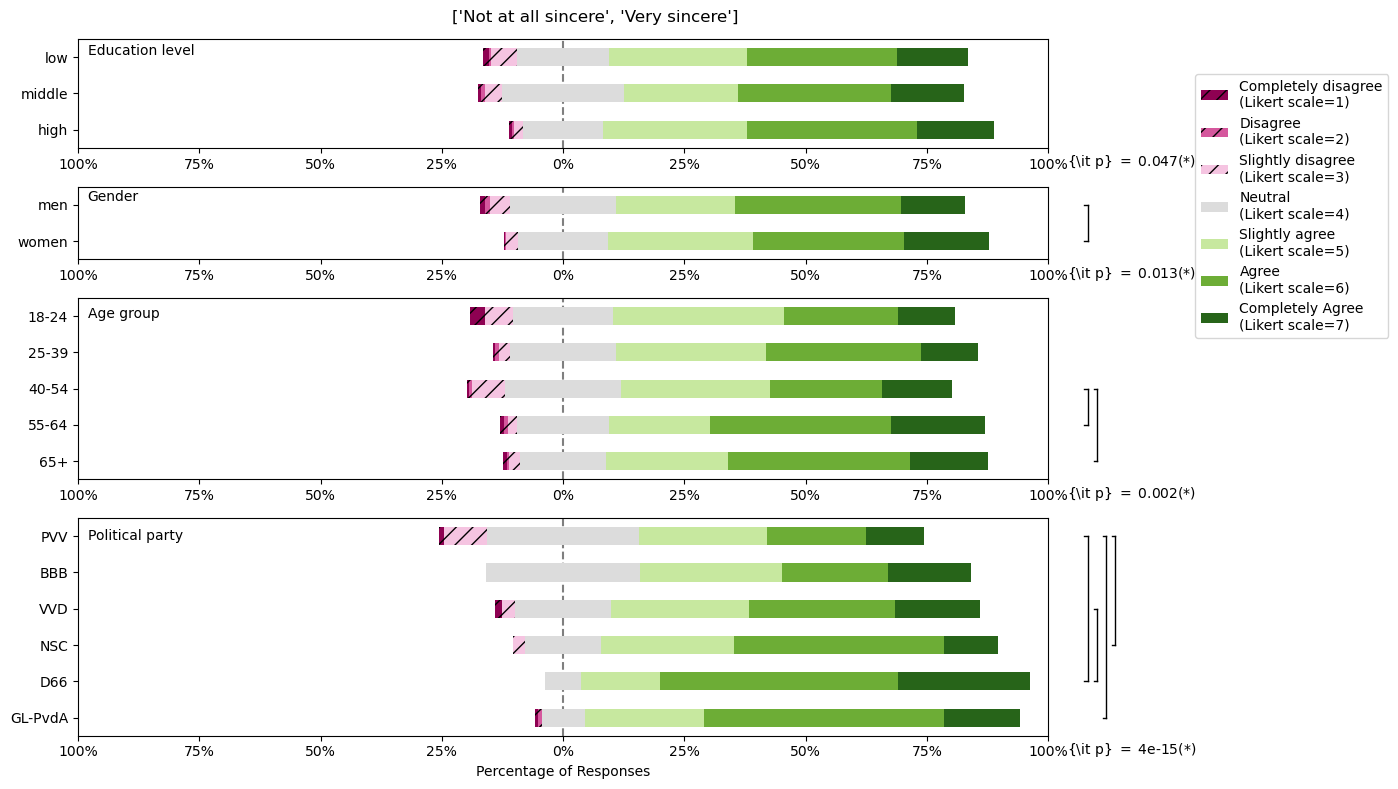

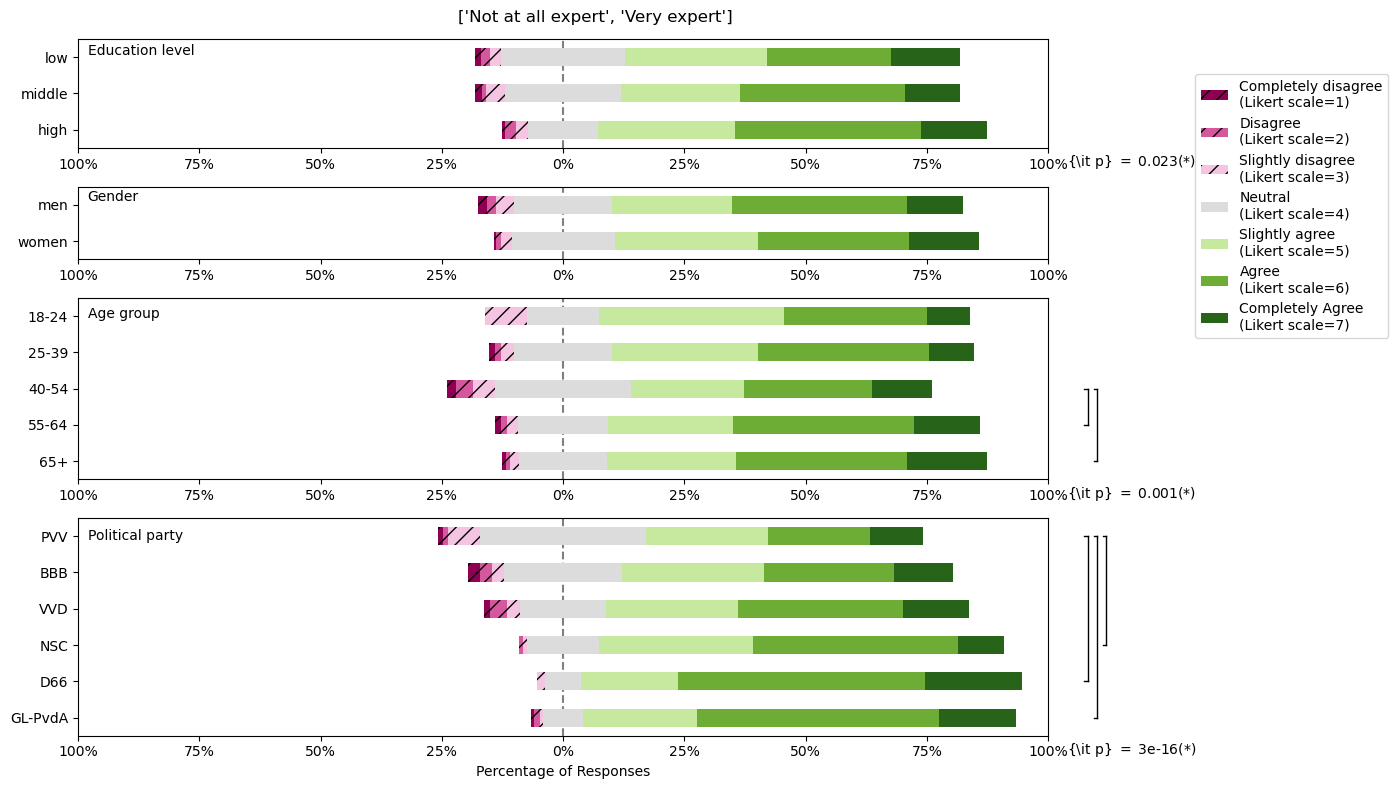

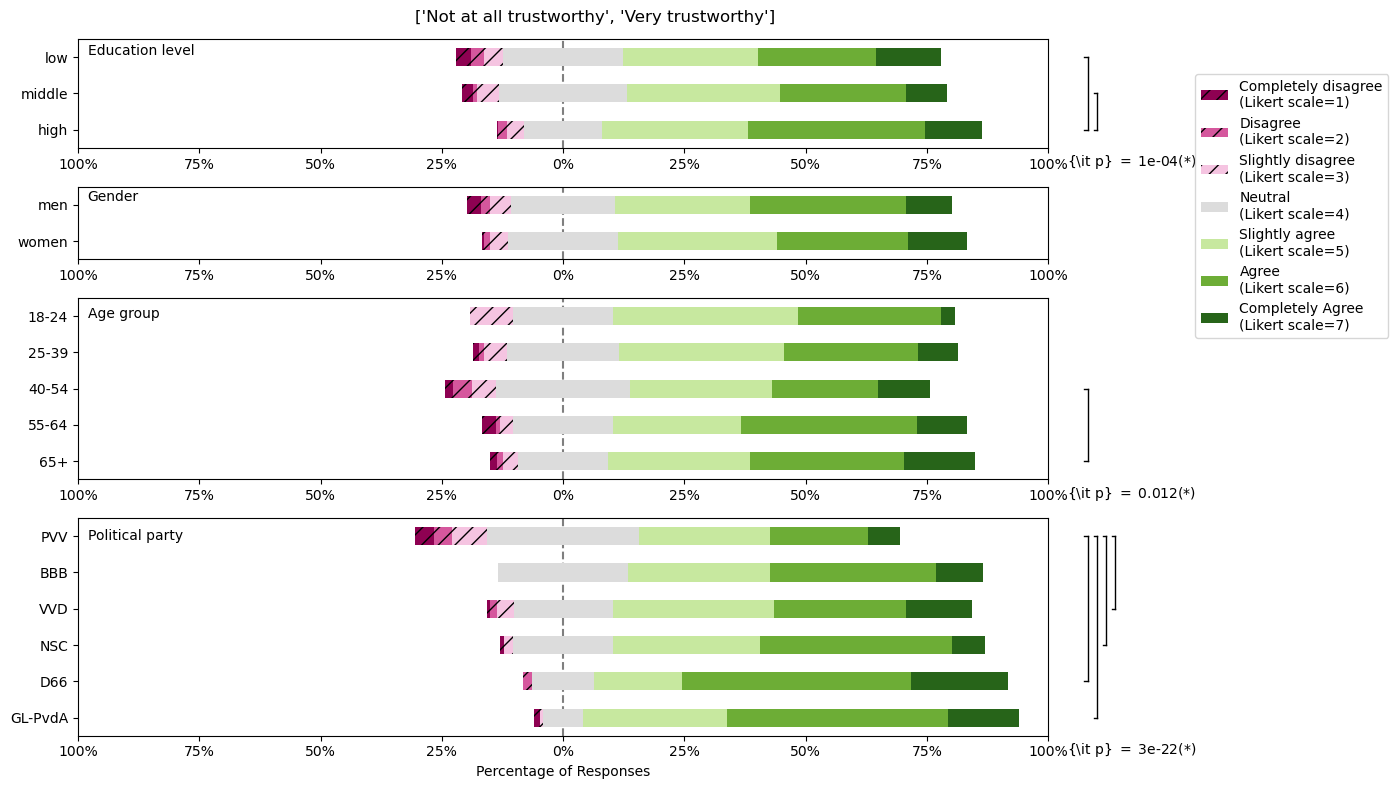

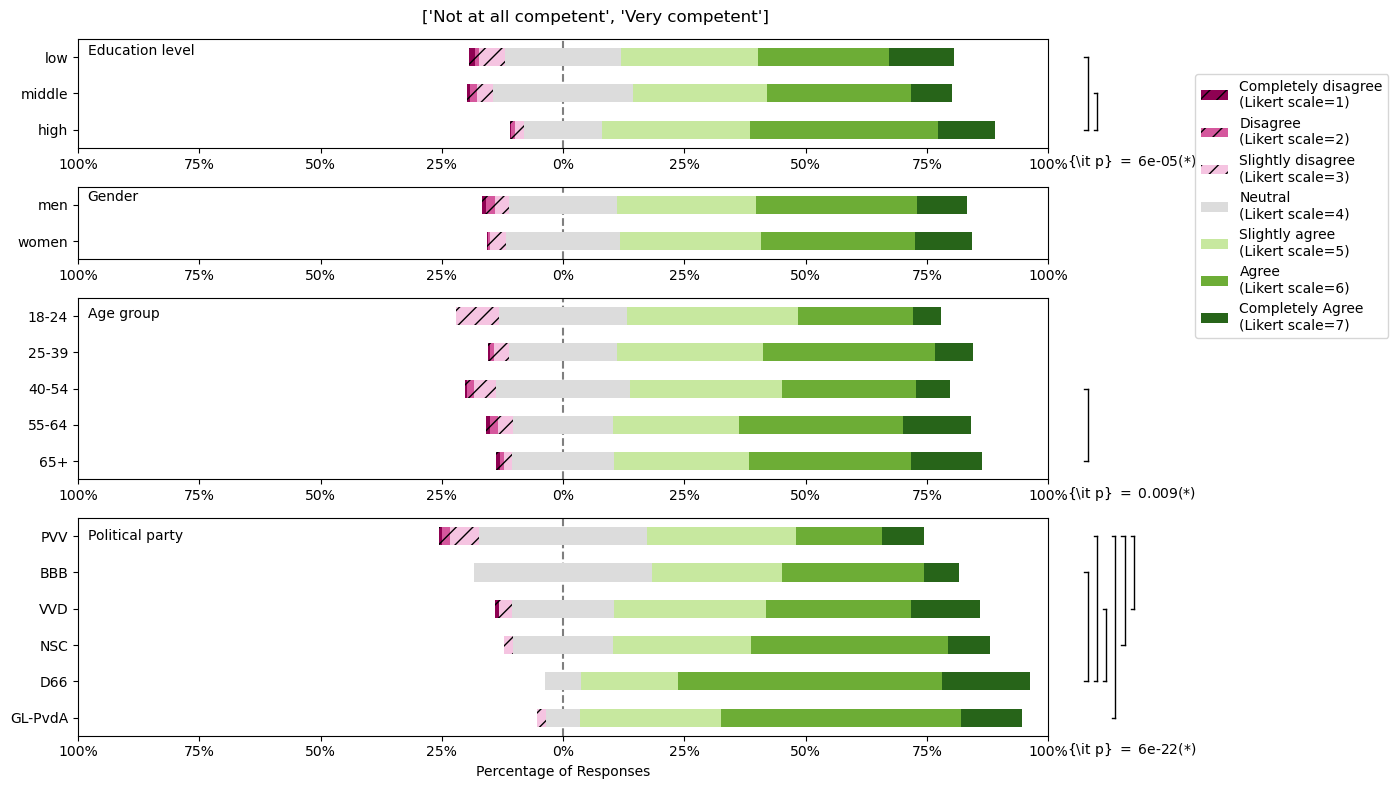

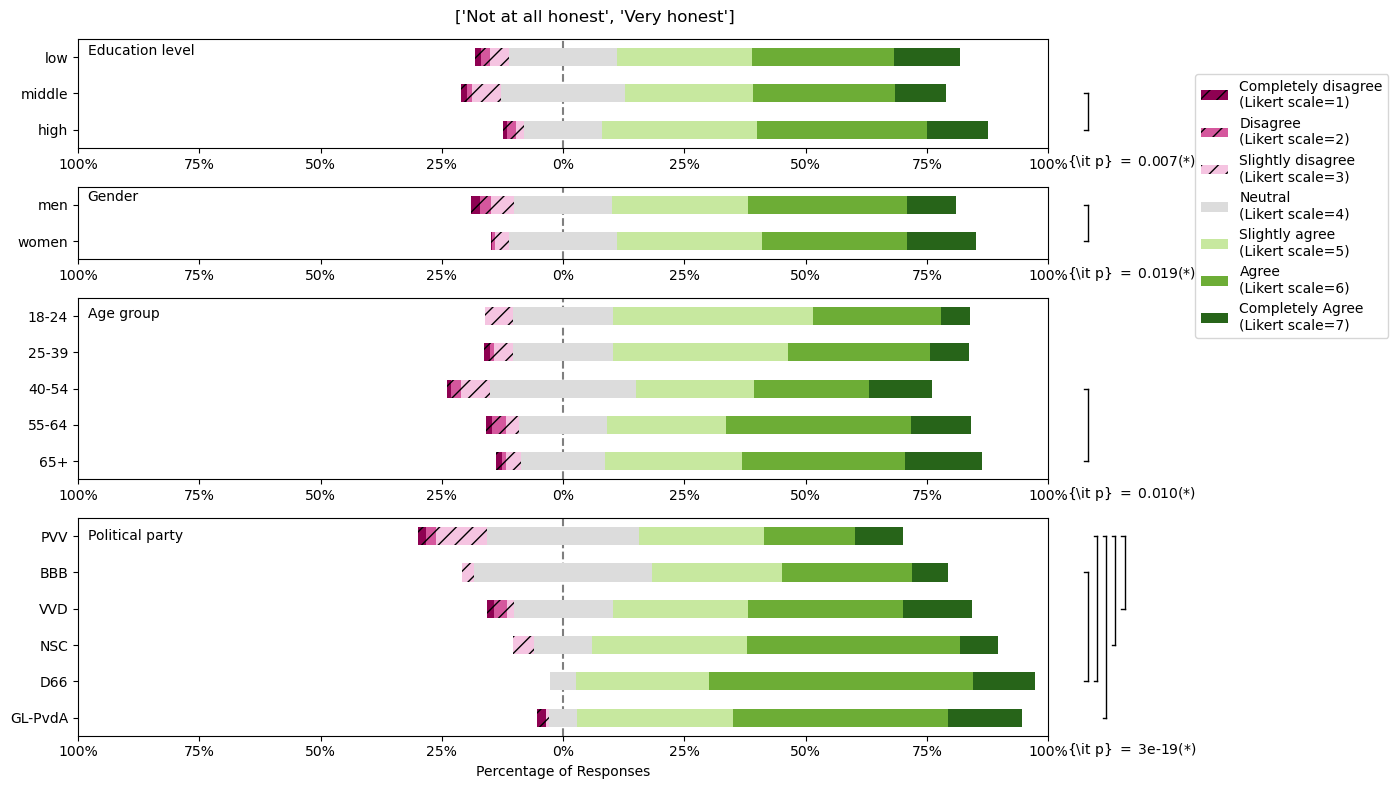

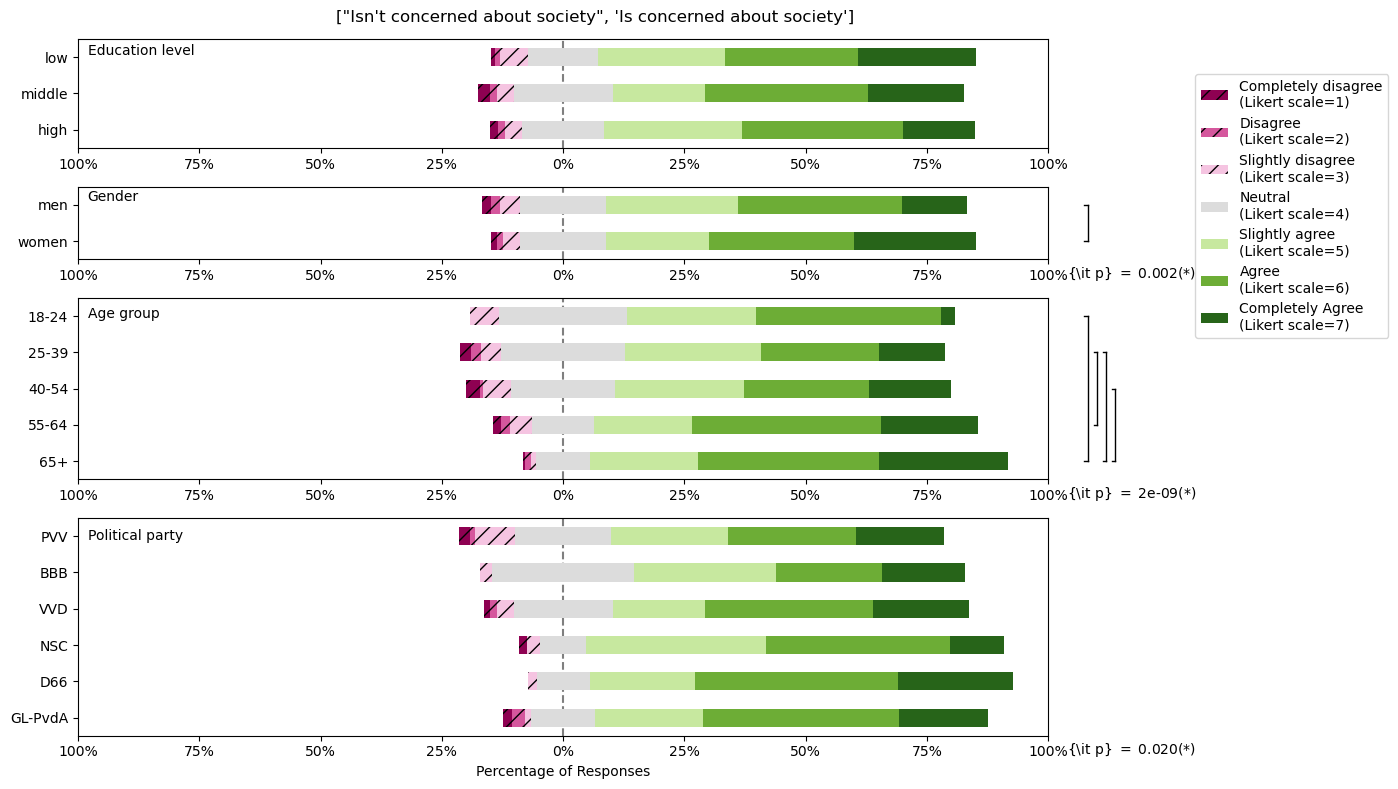

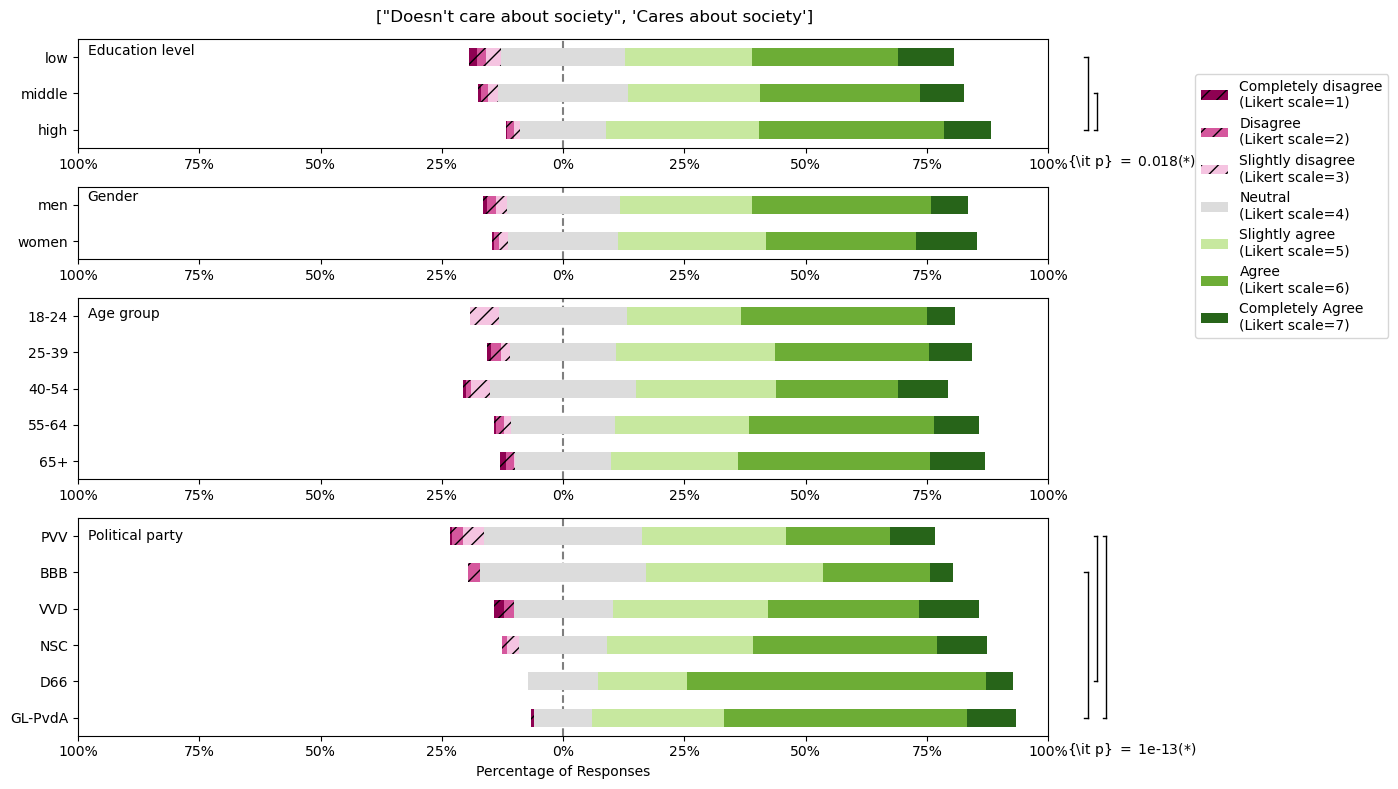

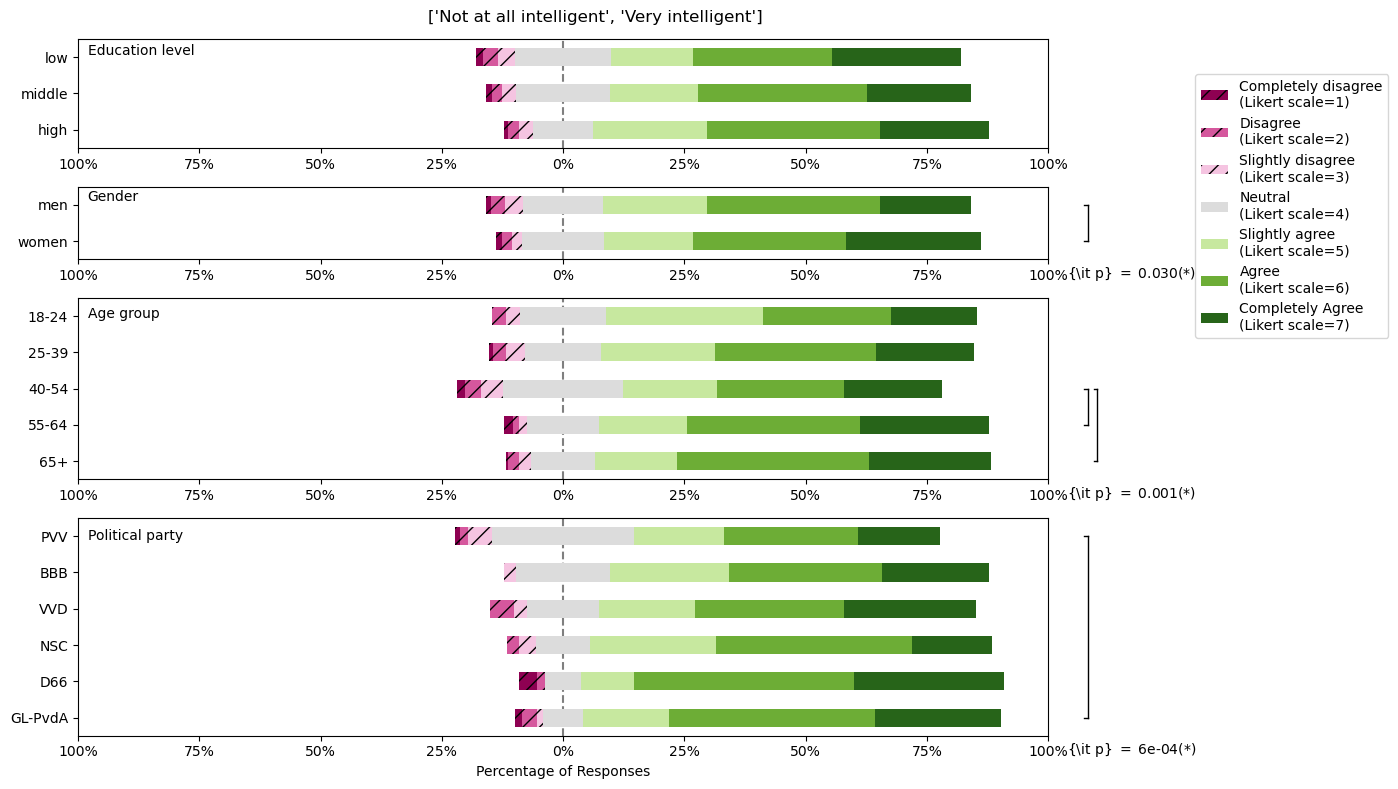

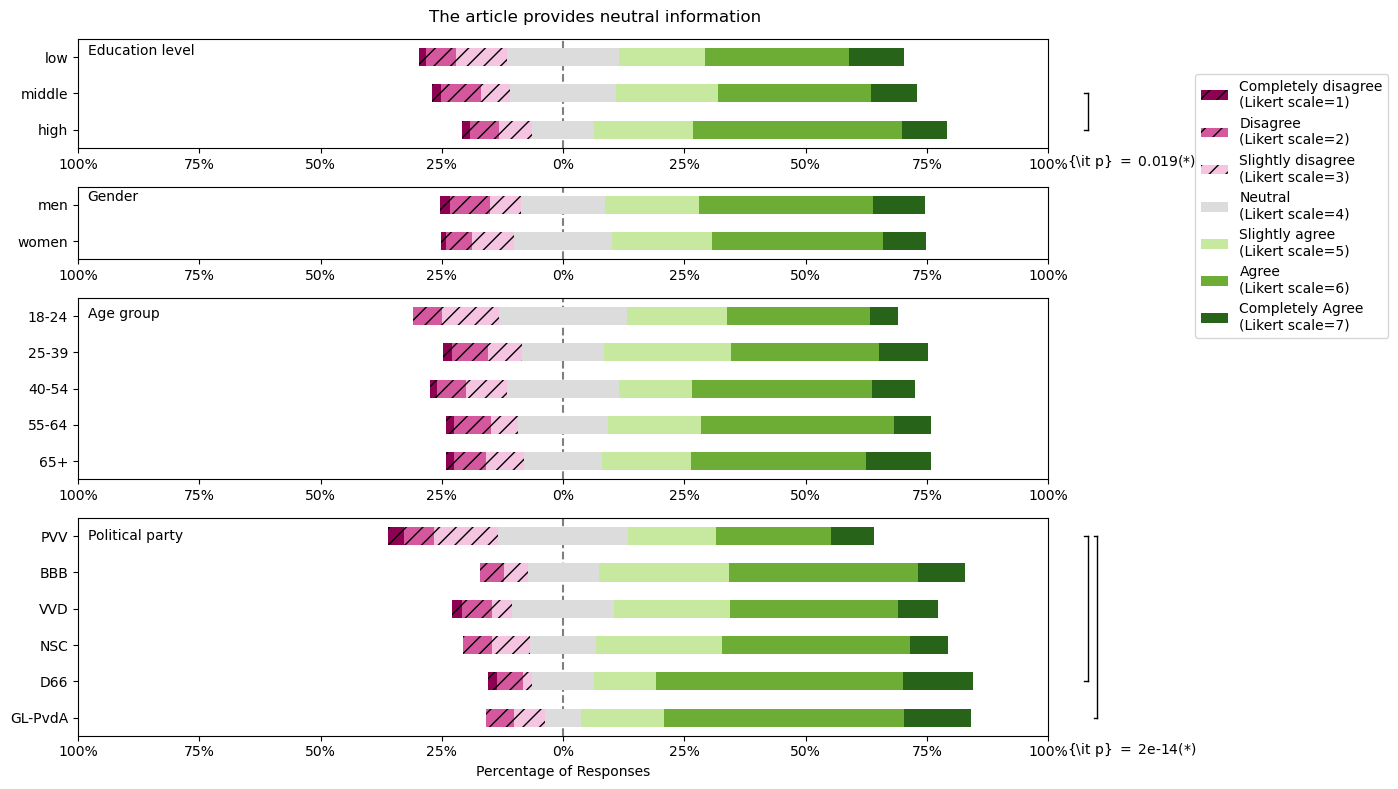

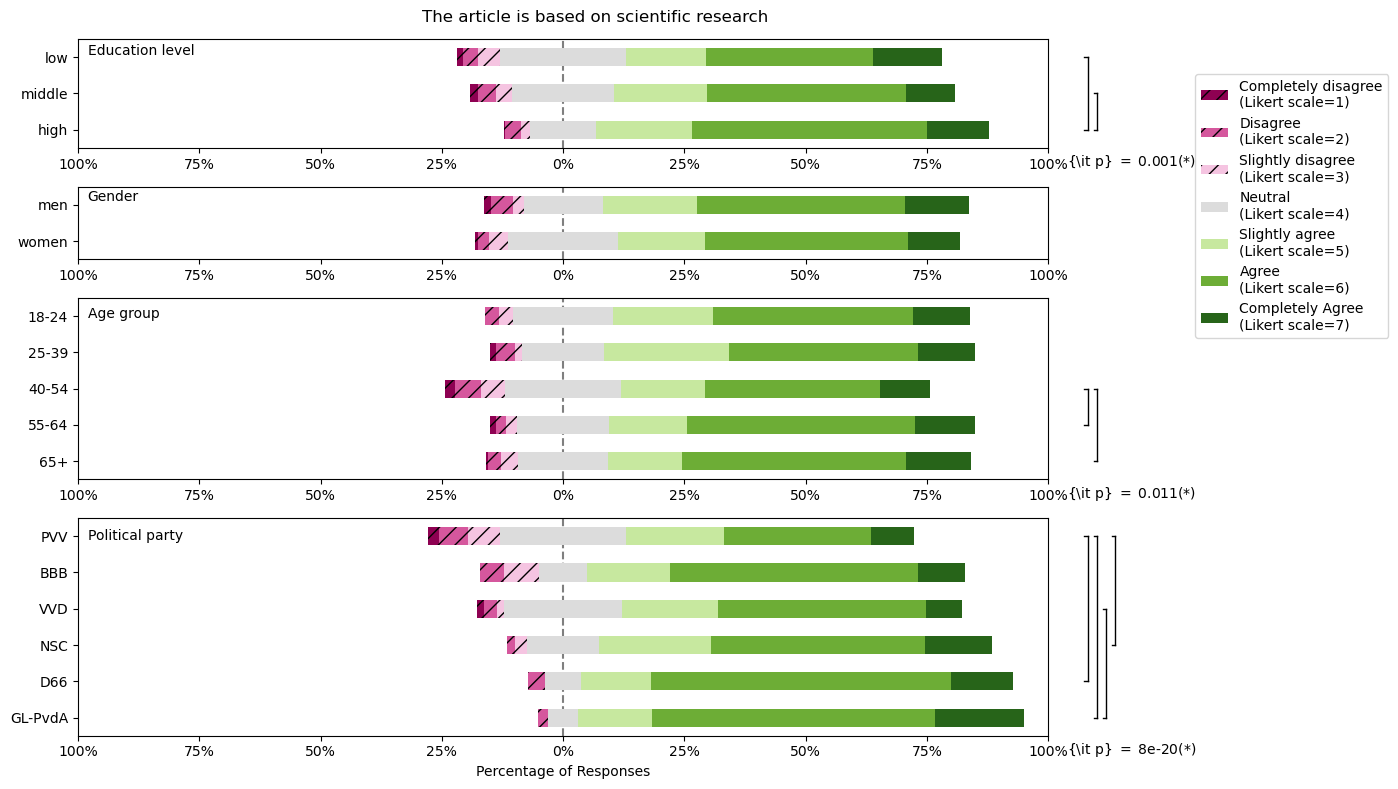

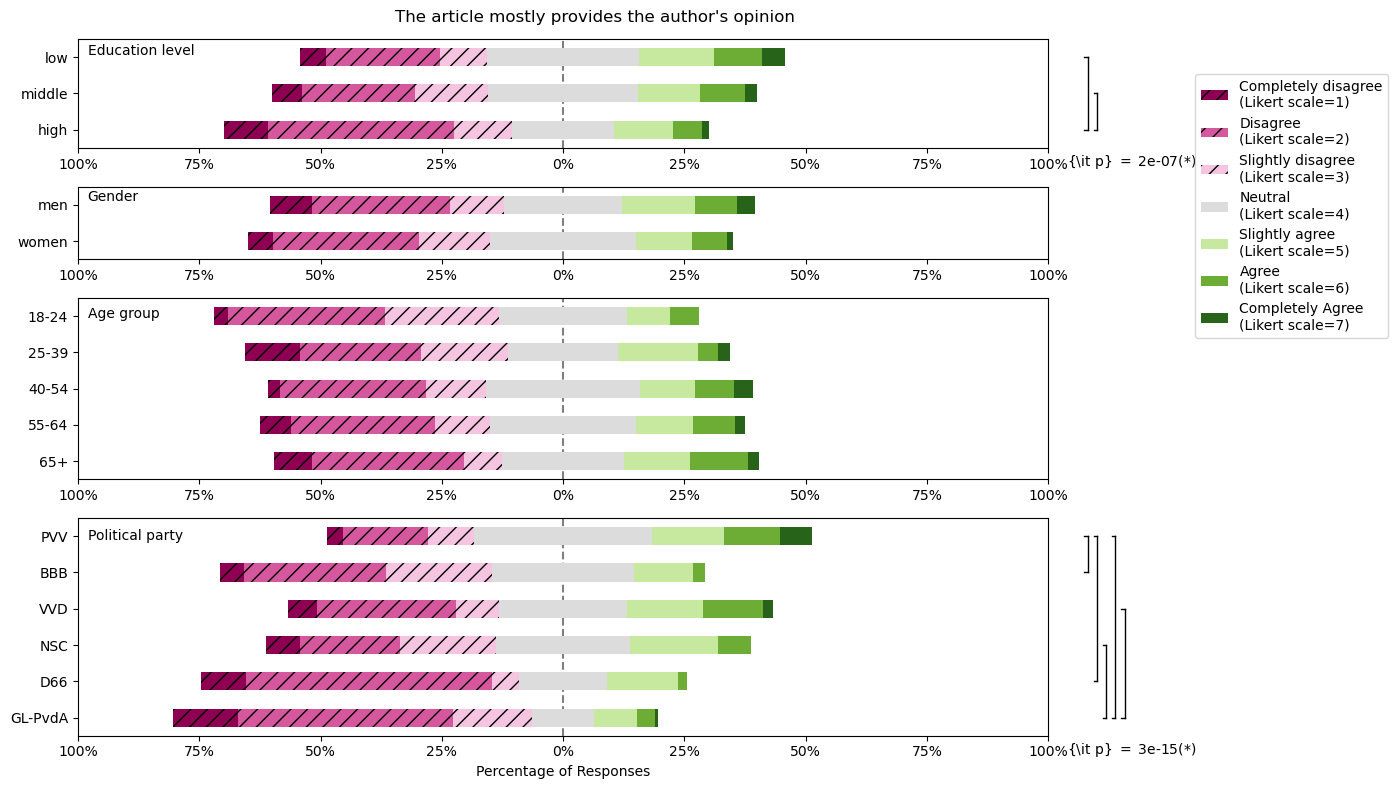

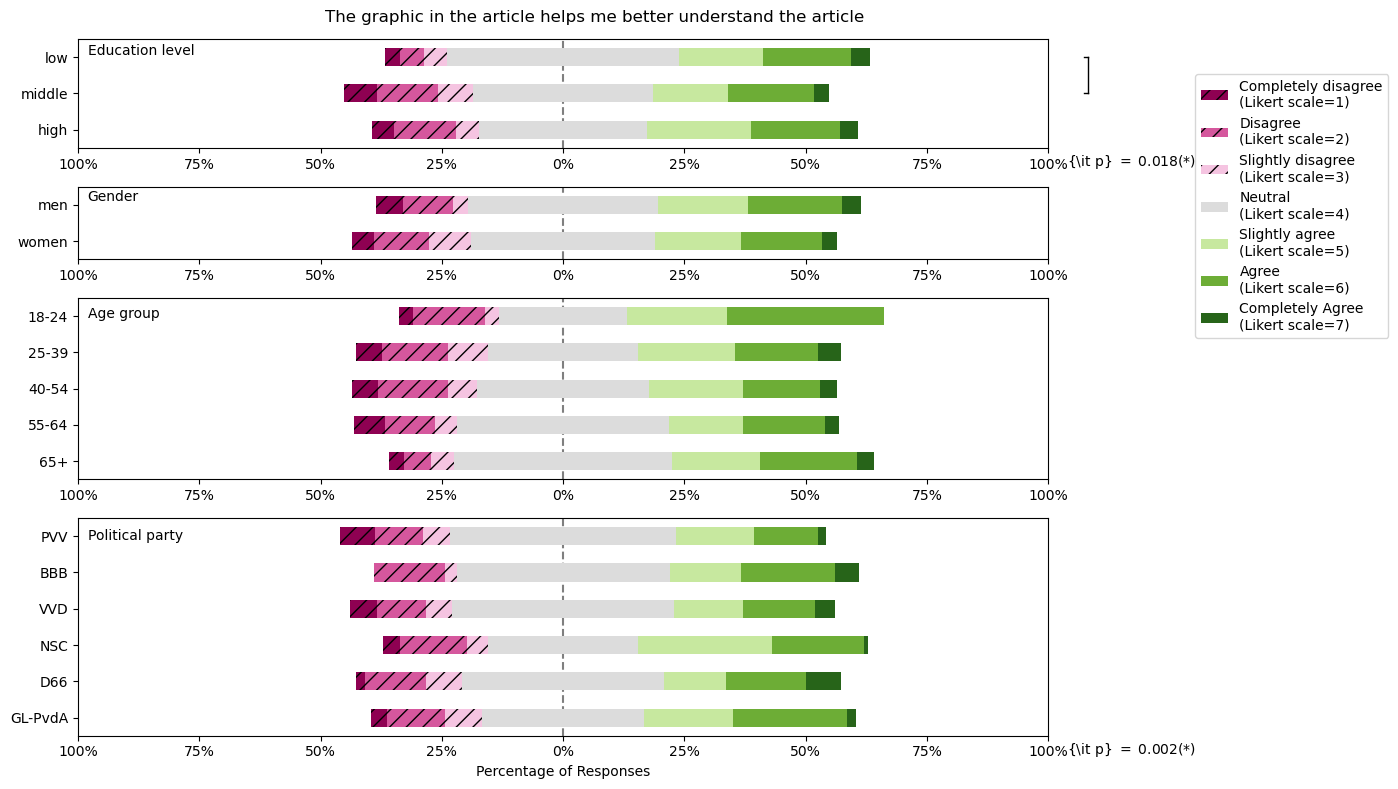

In [ ]:
# Create extra Figures for subsets of data

cmap = matplotlib.colormaps['PiYG']
colors = ["#ffffff00"] + [cmap(i) for i in np.linspace(0, 1, 7)]
colors[4] = "gainsboro"

for question in questions:
    fig = plt.figure(figsize=(figwidth, 8))
    gs = GridSpec(4, 2, figure=fig, height_ratios=[3, 2, 5, 6], width_ratios=[1, 0.1])

    for i, cond_col, condition_labels, title_before in [
        (0, "OPLEID_HER", ["laag", "midden", "hoog"], "Education level"),
        (1, "GESLACHT2", ["Man", "Vrouw"], "Gender"),
        # (2, "nielsen_4", df.nielsen_4.unique(), "Region"),
        (2, "LFT5", ['18-24', '25-39', '40-54', '55-64', '65',], "Age group"),
        (3, "IOPOL2023", party_order, "Political party"),]:

        ai = fig.add_subplot(gs[i,0])

        data = pd.DataFrame(df[question]).where(df[cond_col] == condition_labels[0])
        data.columns = [cat_translations[condition_labels[0]]]
        for condition in condition_labels[1:]:
            data[cat_translations[condition]] = df[question].where(df[cond_col] == condition)

        a = plot_likert.plot_likert(data, [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ax=ai, colors=colors, plot_percentage=True, xtick_interval=25, pad_100=True)
        add_hatchting(a)

        ai.get_legend().remove()
        ai.set_xlabel('')

        ai.text(0.01, 0.95, f"{title_before}", transform=ai.transAxes, ha='left', va='top')

        pval = pg.anova(dv=question, between=cond_col, data=df, detailed=False)['p-unc'].mean()
        if pval < 0.05:
            ai_bracket = fig.add_subplot(gs[i,1])
            pt = pg.pairwise_tests(dv=question, between=cond_col, data=df, padjust='holm', alternative='two-sided')
            plot_brackets(ai_bracket, ai, pval, pt, column_mapping=cat_translations)


    ai.set_xlabel("Percentage of Responses")
    plt.suptitle(f"{questions[question]}")
    handles, labels = ai.get_legend_handles_labels()
    fig.legend(handles, likert_labels, bbox_to_anchor=(1, .9), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()